# [Introduction to Data Science: A Comp-Math-Stat Approach](http://datascience-intro.github.io/1MS041-2020/)
## 1MS041, 2020 
&copy;2020 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 09. Estimation, Likelihood, Maximum Likelihood Estimators and Regressions



## Outline of this notebook

- Estimation and Likelihood
- Parameter, Models, and Real Life
- The Likelihood Function
- The Likelihood Function for the $Bernoulli(\theta)$ RV
- The Log-likelihood Function
- Maximum Likelihood Estimator (MLE) and Maximum Likelihood Estimate (MLe)
- Example: New Zealand Lotto Data
- Using Sage for Basic Algebra and Calculus
- Symbolic Expressions for the Maximum Likelihood Estimator using Sage
- New Zealand Earth Quakes - Inter-occurrence times
- The Maximum Likelihood Principle
- Maximum Likelihood and the $Exponential(\lambda)$ RV
- Inter-earthquake Times for New Zealand Earthquakes
- Numerical Optimisation for Finding MLE
- Language BABYLONIA: Python - R - JVM language - C/C++/FORTRAN

#### Coming Attraction:

- Regression (coming attaction in notebook 12)
  - Point Estimation (parametric estimation with the likelihood principle and MLE)
    - linear and logistic models and their least-squares estimators
    - problem of prediction: in regression and classification
      - correlation versus causation
      - assessing fit using diagnostic plots
  - Point Estimation (with empirical risk minimisation principle - point estimation with validation of penalised least squares estimators)
    - bias-variance trade-off (over-fitting)
    - hold-out estimators including cross-validation
  

## Estimation and Likelihood

**Likelihood** is one of the most fundamental concepts in **statistical inference**.  You may have already met some of its applications in other statistics courses, if not there is no sweat!  We will see the ideas from scratch.  The following three so-called decision problems are our main attractions in this likelihood tour.

- **Point estimation**.  A 'single best guess' at some quantity of interest.
- **Set estimation**. Guess a set that traps some quantity of interest with a high probability, for example, a confidence interval.
- **Hypothesis testing**.  Attempt to reject a falsifiable null hypothesis, i.e., make scientific progress through Popper's [falsifiability](http://en.wikipedia.org/wiki/Falsifiability), an important concept in [science](http://en.wikipedia.org/wiki/Science) and the [philosophy of science](http://en.wikipedia.org/wiki/Philosophy_of_science).

Likelihood also comes into regression, classification, risk minimisation, *all Bayesian methods*, etc. ...

There are two types of estimation.  In this worksheet we are looking at **parametric estimation**.  The other kind of estimation is *non-parametric estimation*.

## Parameters, Models and Real Life

What do we mean by parametric estimation?  In parametric estimation, we assume that the data comes from a particular type of probability distribution and we try to estimate the parameters of that distribution.  What are parameters, in a statistical sense?  Remember the $Bernoulli(\theta)$ random variable?  A $Bernoulli$ distribution has one parameter, usually denoted as $\theta$.  We talked about modelling events such as the outcome of a toss of a coin as using the $Bernoulli(\theta)$ random variable.  If the coin is fair then, in our model, $\theta = \frac{1}{2}$.  If the random variable $X$ takes value 1 when the fair coin lands heads, then we model $P(X = 1) = \frac{1}{2}$.

When we speak about the probability of observing events such as the outcome of a toss of a coin, we are assuming some kind of model.  In the case of a coin, the model is a $Bernoulli$ RV. This model would have one parameter,  the probability of the coin landing heads.

When we introduced the $Exponential$ distribution, we talked about the $Exponential(\lambda$) RV, or the $Exponential$ parameterised by $\lambda$.  Distributions can be parameterised by more than one quantity.  We have already met the $Uniform(\theta_1, \theta_2)$ - this has two parameters, $\theta_1$ and $\theta_2$.  Another distribution you may be familiar with, although we have not discussed it in this course, is the Normal distribution which is parameterised by $\mu$ and $\sigma$.   The symbols like $\theta$, $\lambda$, $\mu$, $\sigma$ are conventionally used for the parameters of these distributions.  It is useful to  become familiar with these conventions (see for example Wikipedia on the Exponential  or Normal)

There are many applications of computational statistics which involve models of real life events, and it is not enough to say "this can be modeled with a $Bernoulli$ RV", or "Orbiter bus inter-arrival times can be modelled with an $Exponential$ RV".  We also have to choose parameters for our models.

We also remind ourselves that the probabilty density function (probability mass function for a discrete random variable) and distribution function depend on the parameters when we write them.  In the case of the $Bernoulli$, for example, the probability mass function is denoted by  $f(x;\theta)$.  

In real life, we are usually not trying to do "textbook" examples like calculating the probability of an event given a distribution and parameter value(s).  We may be able to see the outcomes of a process, but we can never know exactly what that process is, all we can do is try to find a useful model for it.  We are trying to use the information available to us in the form of observations or data to make our models, including guessing/estimating values for the model parameters.   We have to turn our thinking around and focus on what the data can tell us about the model.  In particular, in this course, we focus on what the data can tell us about model parameters - parametric estimation.   Now is a good time to reflect on these words of the renowned Statisticians:

> All models are wrong, but some are useful --- George Edward Pelham Box

> The only math I did not use is the one I did not know -- Lucien Le Cam

## The Likelihood Function

Likelihood, as we said above, is a fundamental concept in statistical inference ("inference" - making inferences from observations, making guesses based on information in data).

In informal terms, likelihood is "the likelihood of the parameters for the observed data".  More formally, *likelihood is a function of the parameter and is proportional to the conditional probability of the data given the parameter*. 

We can talk about a likelihood function where the domain of the likelihood function is all the possible values for the parameters (remember, a function is a mapping from a domain to a range): the likelihood function is a mapping from possible values for the parameters to the likelihood of those parameters for the data.  

The likelihood function of $\theta$ based on $n$ observations $x_1, x_2, \ldots, x_n$ is denoted $L_n(\theta)$.  We have said that it is a mapping from "all possible values for the parameters", i.e. all possible values for $\theta$, to the likelihood of those parameters given the data $x_1, x_2, \ldots, x_n$.  In our formal notation, if we know that $\theta$ must be somewhere in the parameter space ${\mathbf{\Theta}}$, then $L_n(\theta)$ is a mapping from $\mathbf{\Theta}$ to the real numbers $\mathbb{R}$:

$$L_n(\theta): \mathbf{\Theta} \rightarrow \mathbb{R}$$

For example, in the case of a $Bernoulli(\theta)$ RV, we know that the parameter $\theta$ must be between $0$ and $1$, or $\theta \in [0,1]$.  In the case of an $Exponential(\lambda)$ random variable parameterised by $\lambda$, we know $\lambda > 0$, i.e., $\lambda \in \mathbf{\Lambda} = (0,\infty)$. 

NOTE: $\Lambda$ is the Greek upper-case of $\lambda$, which as usual we reserve for random variables taking values in $\mathbf{\Lambda}$. These distinctions are not too impotant for this course, and we will keep the notation light here, but when you learn more advanced concepts in statistical machine learning and Bayesian inference, it will become very important to keep the notations clear between samples, random variables and the space where they take their values for data, statistics and parameters (which themselves become random variables in advanced courses you may take in a couple years).

We will focus on the likelihood function for independent and identically distributed (IID) random variables.

Suppose we have $X_1,X_2,\ldots,X_n$ as $n$ independent random variables and they are all identically distributed with $f(x;\theta)$.   We would write this as $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$. Here $(X_1,X_2,\ldots,X_n)$ is an $\mathbb{R}^n$-valued random variable (sometimes called a random vector). Then, 

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$$

merely means, due to independent and identical distribution among all $X_1,X_2,\ldots,X_n$, that the $\mathbb{R}^n$-valued random variable $(X_1,X_2,\ldots,X_n)$ has joint density:

$$f(x_1,x_2,\ldots,x_n; \theta) = f(x_1;\theta)\times f(x_2;\theta) \times \cdots \times f(x_n;\theta) = \prod_{i=1}^n f(x_i;\theta) $$

Thus, $f(x_1,x_2,\ldots,x_n; \theta)$ is termed the joint density of the data $(X_1, X_2, \ldots, X_n)$ for a given $\theta$.

In conclusion, when $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$ the joint density $f(x_1, x_2, \ldots, x_n; \theta)$ is the product of the individual densities $\displaystyle \prod_{i=1}^n f(x_i ; \theta)$. 


This implies that the likeilihood function $L_n(\theta)$, which formally also depends on the observed data, is:
$$
\begin{array}{ll}
L_n(\theta) &:= L_n(\theta; x_1,x_2,\ldots,x_n) = L_n(\theta; \text{ data })\\
&\propto P(\text{ data } | \theta)\\
&= f(x_1,x_2,\ldots,x_n; \theta)\\
&= f(x_1;\theta)\,f(x_2;\theta) \ldots f(x_n;\theta) \\
&=: \prod_{i=1}^n f(x_i ; \theta)\\
\end{array}
$$


So when $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$, 

$$
\boxed{L_n(\theta) := \prod_{i=1}^n f(x_i ; \theta)}
$$
 

### The likelihood Function for the $Bernoulli(\theta)$ RV

We can make all this theory a little more real by considering the $Bernoulli$ RV.  In the last worksheet, we wrote function to be able to simulate samples from a $Bernoulli(\theta)$ RV given some value for the parameter $\theta$ and the number of samples required.  Suppose we used this function, with a small adaptation, to simulate some samples now using $\theta^*$ - but there is a catch:  you don't know what the value of $\theta^*$ is. 

### Prepare to simulate data from a secret $\theta^*$

Just place cursor on next hidden cell hit 'Run' button to evaluate it - its generating our simulated data from a secret $theta^*$ that we will not see by clicking on _here_ below. It has a function `bernoulliSampleSecretTheta(n)` that will produce $n$ IID $Bernoulli(\theta^*)$ samples for us.

In [3]:
# this needs to be hidden
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSampleSecretTheta(n, theta=0.30, mySeed=30):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param mySeed is a seed for the random number generator, defaulting to None.
    Returns a simulated Bernoulli sample as a list.'''
    set_random_seed(mySeed)
    us = [random() for i in range(n)]
    set_random_seed(None)
    # use bernoulliFInverse in a list comprehension
    return [bernoulliFInverse(u, theta) for u in us] 


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
# Press Ctrl+Enter to evaluate this cell 
# and obtain our data, i.e., sample of 10 Bernoulli(theta*) RVs
bSample = bernoulliSampleSecretTheta(10)
print( bSample)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


In [5]:
# evaluate the hidden cell above and hide it immediately - its generating our simulated data from a secret theta*

What we have is $X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ where $\theta^* \in [0,1]$ is the true, but unknown value (assuming you have not peeked into click `here` above!) of the parameter $\theta$ responsible for producing all those observations in `bSample`.

Recall that the $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} 
=\begin{cases}
\theta & \text{ if } \ x=1,\\
1-\theta &\text{  if } \ x=0,\\
0 & \text{ otherwise} 
\end{cases}
$$

So, for $x_1, x_2, \ldots, x_n \in \{0,1\}$, the joint density of $n$ IID $Bernoulli(\theta)$ RVs is:

$$
\begin{array}{lcl}
f(x_1,x_2,\ldots,x_n; \theta) 
:= \displaystyle\prod_{i=1}^n f(x_i ; \theta) 
& = & \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}\\ 
& = & \theta^{\sum_{i=1}^n x_i} (1-\theta)^{\left(n - \sum_{i=1}^n x_i\right)} 
\end{array}
$$

$\sum_{i=1}^n x_i$ is a bit of a mouthful, so lets summarise this as $t_n = \displaystyle\sum_{i=1}^n x_i$

We can use $t_n$ to make our likelihood function a little more friendly:

$$L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$$

What we have actually done is to *define a statistic of the data*.  Remember that a statistic is a function of the data.  We will call our statistic (note the big $T$) $T_n$.  The $n$ subscript reminds us that it is a function of $n$ observations or data points $X_1,X_2,\ldots,X_n$. 

$T_n$ is a function of the data, a mapping from the data space $\mathbb{X} = \{0,1\}^n$ to the space $\mathbb{T}_n$:

$$
T_n(X_1, \ldots, X_n) = \displaystyle \sum_{i=1}^n X_i : \mathbb{X} \rightarrow \mathbb{T}_n
$$

If you are wondering what the space $\mathbb{T}_n$ is for the $Bernoulli$, think about the range of possible values of $\displaystyle\sum_{i=1}^n X_i$ when each $X_i$ can only be 0 or 1..... Now, do you agree that $\mathbb{T}_n=\{0,1,\ldots,n\}$? If so, observe that the size of the data space $\mathbb{X}_n$ is $2^n$ but that of the statistic $\mathbb{T}_n$ is just $n+1$. The natural question now is if we have lost any information about the parameter $\theta$ that was in the data when summarising the data by this statistic? Such questions of so called *[sufficiency](https://en.wikipedia.org/wiki/Sufficient_statistic) of the statistic for the probability model parameterised by $\theta$ that is assumed to be generating the data* are the starting point for a more mathematical statistical path one can take. We will not delve into this here.

**In conclusion**, we have some actual observations or data points or just sample $(x_1, \ldots, x_n)$, such that:

- $(x_1, \ldots, x_n)$ as a realisation of $\mathbb{X}$-valued random variable $(X_1,X_2,\ldots,X_n)$ from $n$ IID $Bernoulli(\theta)$ trials
  - with joint density $f(x_1,x_2,\ldots,x_n; \theta): \mathbf{X} \to \mathbb{R}$ 
- and corresponding to this we have a realisation of our statistic $T(X_1,X_2,\ldots,X_n)=\sum_{i=1}^n X_i : \mathbb{X} \to \{0,1,\ldots,n\}$:
  - $T_n(x_1, \ldots, x_n) = t_n = \displaystyle\sum_{i=1}^n x_i$
- and finally we can express the likelihood function as $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$

We can easily use SageMath/Python to calculate $t_n$ for us, using the sum function.  For example, for the small sample of 20 simulated Bernoulli observations above:

In [6]:
tn = sum(bSample)
tn

3

We can also write ourselves a SageMath/Python function to calculate the likelihood of a specified value of $\theta$ given $n$ and $t_n$.  

In [7]:
def likelihoodBernoulli(theta, n, tStatistic):
    '''Bernoulli likelihood function.
    theta in [0,1] is the theta to evaluate the likelihood at.
    n is the number of observations.
    tStatistic is the sum of the n Bernoulli observations.
    return a value for the likelihood of theta given the n observations and tStatistic.'''
    retValue = 0 # default return value
    if (theta >= 0 and theta <= 1): # check on theta
        mpfrTheta = RR(theta) # make sure we use a Sage mpfr 
        retValue = (mpfrTheta^tStatistic)*(1-mpfrTheta)^(n-tStatistic)
    return retValue

**Note:** We use `RR(theta)` above to make sure that we use a  souped-up Sage multi-precision floating-point real (mpfr) number type in our calculation, which will improve the precision of the calculation of the likelihoods. 

This may seem like an over-kill to those who have their own ideas of what a "course" in *statistics*, *computer science* or *mathematics* is supposed to "teach". Asking those whose fingers on key-boards are fielding real-world fires in *problems of applied statistics* may know the advantages of using readily available muli-precision floating point arithemtic at our immediate disposal here. You can try removing `RR` and replace it with Python `float` and increase sample size $n$ to know what is meant here (unless you field via `log`s and number-screen dynamic shifts)!

### YouTry in class

You should be able to understand what the `likelihoodBernoulli` function is doing and be able to write this kind of SageMath function for yourselves.  Why do we need to check that the value for `theta` passed to the function is between 0 and 1?  How does the function deal with a situation where it is asked to evaluate a likelihood for `theta < 0` or `theta > 1`?

(end of You Try)

---

Let's look at a very simple situation where we have one observation ($n=1$) and it is a 0.  What is the realisation of $T_1$, i.e., $t_1$?

In [8]:
bernoulliSample0 = [0]
tn = sum(bernoulliSample0)
tn

0

### YouTry in class if you are bored or at home

Try going back to the $Bernoulli$ likelihood function $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to calculate the likelihood of $\theta =0$ without using the SageMath function. Think about what the likelihood function is doing (the mathematical derivation for the $Bernoulli$ case was already scribed above, but you need to be able to do such derivations on your own in the exam or in assignments when I give you another distribution that the data is independent and identically distributed from). 

When you have done that, check that you get the same answer using our `likelihoodBernoulli` SageMath function:

In [9]:
tryTheta0 = 0 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta0, n, tn)

1.00000000000000

What about $\theta = 1$?  What is the likelihood of $\theta = 1$ when we have observed 0?  Think back to what the $\theta$ parameter means in a $Bernoulli$ distribution:

The $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} =\begin{cases}\theta& \text{ if } \ x=1,\\1-\theta &\text{ if } \ x=0,\\0 & \text{ otherwise} \end{cases}
$$

Remember that the idea behind the likelihood function is "what is the likelihood of a parameter value given our data?"

When you have worked out the answer using $L_n(\theta)$, check using our `likelihoodBernoulli` SageMath function:

In [10]:
tryTheta1 = 1 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0.000000000000000

What about $\theta = \frac{1}{2}$?

In [11]:
tryTheta1 = 0.5 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0.500000000000000

Try to sketch the likelihood function over $\theta \in [0,1]$ for our one observation of 0.

Now, what if instead of observing a 0 in our one-observation case, we had observed a 1?

What is our realisation of $T_n$ now?  What is our intuition about the likelihood of $\theta = 0$? $\theta = 1$? 

Again try to sketch the likelihood function for our single observation of 1.

We could use `likelihoodBernoulli` and a for loop to calculate the likelihood for some different values of $\theta$ without repeating code: 

In [12]:
bernoulliSample1 = [1]
n = len(bernoulliSample1) # find n as the length of the sample list
tn = sum(bernoulliSample1) # find tn as the sum of the samples
from pylab import arange # import arange from pylab
for t in arange(0, 1.1, 0.2):
    # calculate the likelihood of theta=tryTheta0=0
    print ("If we observe", bernoulliSample1, \
        "The likelihood of theta=", t, " is ", \
        likelihoodBernoulli(t, n, tn))

If we observe [1] The likelihood of theta= 0.0  is  0.000000000000000
If we observe [1] The likelihood of theta= 0.2  is  0.200000000000000
If we observe [1] The likelihood of theta= 0.4  is  0.400000000000000
If we observe [1] The likelihood of theta= 0.6000000000000001  is  0.600000000000000
If we observe [1] The likelihood of theta= 0.8  is  0.800000000000000
If we observe [1] The likelihood of theta= 1.0  is  1.00000000000000


Or, we could use a list comprehension to get a list of likelihoods corresponding to the list of possible values of $\theta$:

In [13]:
ths = arange(0, 1.1, 0.2)
[likelihoodBernoulli(t,len(bernoulliSample1),sum(bernoulliSample1)) \
     for t in ths]

[0.000000000000000,
 0.200000000000000,
 0.400000000000000,
 0.600000000000000,
 0.800000000000000,
 1.00000000000000]

If you have forgotten about the arange function, it is a useful way of getting a sequence of values in steps.  We have used the statement `from pylab import arange` because we don't want the whole of the `pylab libary`, just `arange`.  Check the documentation if you need a reminder about `arange`.

In [26]:
?arange

/Users/avelin/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sphinx/util/nodes.py:94: FutureWarning: 
   The iterable returned by Node.traverse()
   will become an iterator instead of a list in Docutils > 0.16.
  for classifier in reversed(node.parent.traverse(nodes.classifier)):


You will see that the `arange` function (which stands for array range) can take values for `start`, `stop`, and `step`.  You will also see that (like `range`), the list you get will go to just below the value you specifiy for `stop`.  To get a list of values from 0 to 1 in steps of 0.2 our `stop` value was 1.1.  1.2 would also have worked, but a `stop` value of 1.3 or 1.4 would have given us a list from 0 to 1.2 in steps of 0.2. 

Try some different values in `arange` if you want to check how it works again. *But you should recall this from the*  `numpy` *lectures! on* `array`.

In [14]:
from pylab import arange
arange(0, 1.1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

(end of You Try)

---

Now, we look at a possible sample of $n=2$ observations from a Bernoulli process with unknown $\theta$:

In [15]:
smallBSample = [0,1]

What is $t_n$, the realisation of the $T_n$ statistic now with $n=2$?

In [16]:
tn = sum(smallBSample) # what is tn
tn

1

Use $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to think about the likelihood of some possible values for $\theta$ given this data.  Think what the shape of the likelihood function might be. 

In the visualisation below we have used our `likelihoodBernoulli` function to plot the likelihood function for the cases where we have a single observation 0, a single observation 1, and a small sample of size two with observations: 0, 1.

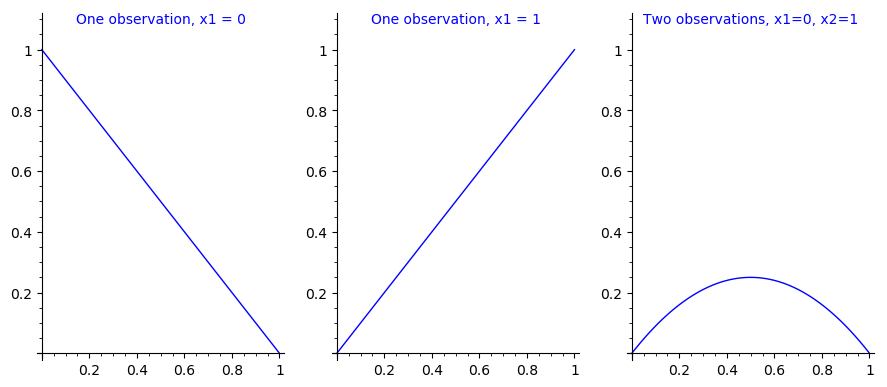

In [17]:
bernoulliSample0 = [0] # make sure we know about our samples
bernoulliSample1 = [1]
smallBSample = [0,1]
from pylab import arange
ths = arange(0,1.01,0.01) # get some values to plot against
p1 = line(zip(ths, [likelihoodBernoulli(t, len(bernoulliSample0),sum(bernoulliSample0)) for t in ths]))
t1 = text("One observation, x1 = 0", (0.5,1.1), fontsize=10)
p1 = p1+t1
p2 = line(zip(ths, [likelihoodBernoulli(t, len(bernoulliSample1),sum(bernoulliSample1)) for t in ths]))
t2 = text("One observation, x1 = 1", (0.5,1.1), fontsize=10)
p2 = p2+t2
p3 = line(zip(ths, [likelihoodBernoulli(t, len(smallBSample),sum(smallBSample)) for t in ths]))
t3 = text("Two observations, x1=0, x2=1", (0.5,1.1), fontsize=10)
p3 = p3+t3
show(graphics_array([p1, p2, p3]),figsize=[9,4])

There are other samples we could get if we draw a sample of size $n=2$ from a $Bernoulli$ RV.  In the visualisation below we plot the likelihood functions for the four unique possible samples:

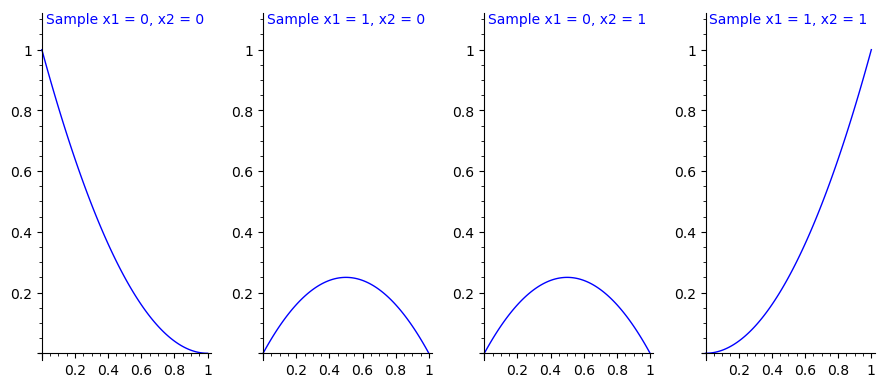

In [18]:
smallBSample1 = [0,0]
smallBSample2 = [1,0]
smallBSample3 = [0,1]
smallBSample4 = [1,1]
listOfSamples = [smallBSample1, smallBSample2, smallBSample3, smallBSample4] # a list of lists
from pylab import arange
ths = arange(0,1.01,0.01) # get some values to plot against
l_plots = [] # an empty list of plots
for sample in listOfSamples: # go through the list of samples one by one
    ptitle = text("Sample x1 = " + str(sample[0]) + ", x2 = " + str(sample[1]), (0.5,1.1), fontsize=10)
    l_plots.append(line(zip(ths, [likelihoodBernoulli(t, len(sample),sum(sample)) for t in ths])) + ptitle) # append plot to list of plots
show(graphics_array(l_plots),figsize=[9,4]) # show the list of plots

We can see that the shape of the likekihood function depends on the sample:

- $(x_1,x_2) \in \{ (0,0), (1,0), (0,1), (1,1)\}$ 
- and more crucially on the statistic 
  - $t_2 \in \{0,1,2\}$
  
In the above plots we are looking at the likelihood for the parameter given the actual data (simulated here, of course for pedagogical reasons).  

As usual, you do not have to know how to do these plots or the interactive plot below to do well in the exam or assignments, but you should understand what a list comprehension statement like the following:

> `[likelihoodBernoulli(t,len(smallBSample),sum(smallBSample)) for t in ths]`

is doing, when `ths = arange(0, 1.01, 0.01)` are some possible values for $\theta \in [0,1]$.

What happens as we increase the sample size $n$?  In the interactive plot below, we use our `bernoulliSampleSecretTheta` to simulate samples of size $n$ with an unknown $\theta^*$.  You can have a look at the effect of increasing $n$:

In [19]:
@interact
def _(n=(2,(2..1000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print ("Likelihood function for n = ", n , " and tn = ", tn)
        from pylab import arange
        ths = arange(0,1,0.001) # get some values to plot against
        p = line(zip(ths, [likelihoodBernoulli(t, n, tn) for t in ths]))
        show(p, figsize=(8,4))
    else:
        print( "n must be greater than 0")

Interactive function <function _ at 0x3329f9950> with 1 widget
  n: SelectionSlider(description='n', options=(…

Remember that for each $n$ you try, the shape of the likelihood function will depend on the $t_n$ for the sample simulated by `bernoulliSampleSecretTheta`.

## The Log-likelihood Function

Working with products, as in 

$$
L_n(\theta) = \displaystyle \prod_{i=1}^n f(x_i;\theta) \quad \text{,  where  } X_1, X_2, \ldots, X_n \overset{IID} \sim f(x_i;\theta)
$$ 

(i.e., $n$ independent and identically distributed random variables), can be inconvenient. Taking logs can be useful here.  The log-likelihood function for some parameter $\theta$ is $l_n(\theta)$ and it is literally the log of the likelihood function $L_n(\theta)$:

$$l_n(\theta) := log(L_n(\theta))$$

You will probably recall from pre-calculus that $\log(a \times b) = \log(a) + \log(b)$.

In SageMath, using the `log` function without specifying a base gives the natural logarithm (logarithm to base $e$) of a value.

In [20]:
a = 5.0
b = 6.0
log(a*b)

3.40119738166216

In [21]:
log(a) + log(b)

3.40119738166216

In [22]:
?log

/Users/avelin/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sphinx/util/nodes.py:94: FutureWarning: 
   The iterable returned by Node.traverse()
   will become an iterator instead of a list in Docutils > 0.16.
  for classifier in reversed(node.parent.traverse(nodes.classifier)):


The SageMath `log` function provides a default parameter value of `None` for the base, and if the base is `None` the natural log is calculated.  If you specify a value for the base when you use the `log` function, you will get the logarithm using this base (default parameter values and `Non`e were discussed in the last notebook:  go back there in your own time if you need to).

In [23]:
log(a, 10) # log to base 10

0.698970004336019

We can generalise this into a useful trick (of course most of you must have seen this in high-school, but just in case!):  

**the log of products is the sum of logs**

$$\log\left(\displaystyle\prod_{j=1}^n y_j\right) = \displaystyle\sum_{j=1}^n\left(\log(y_j)\right)$$

So, if we have $n$ IID (independent and identically distributed) random variables, the log-likelihood function is

$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta) \Longrightarrow
l_n(\theta) = \log(L_n(\theta)) := \log\left(\prod_{i=1}^n f(x_i ; \theta)\right) = \sum_{i=1}^n \log(f(x_i; \theta))
$$

In the case of $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta)$, $n$ independent and identically distributed $Bernoulli$ RVs,

$$
l_n(\theta) = \log(L_n(\theta)) = \log\left(\theta^{t_n}(1-\theta)^{(n-t_n)}\right) = t_n\log(\theta) + (n-t_n)\log(1-\theta)
$$

Here we are using the fact that $\log(a^c) = c\log(a)$. 

If this is not familiar to you, consider $\log(a^2) = \log(a \times a) = \log(a) + \log(a) = 2\log(a)$

and then think what happens if you have $\log(a^3) = \log(a \times a^2) = \log(a) +\ log(a^2) = \log(a) + 2log(a) = 3\log(a)$, etc etc.

### YouTry in class

Write down for yourself the steps to prove that the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$ for $n$ IID samples from $Bernoulli$ RVs.

(end of You Try)

---

Logarithm is a **monotone function** (also known as a monotonic function).  What does it mean when we say that something is a monotone function?  In words, it means that the function preserves the given order.  For once, putting something as a formula may make it easier to understand than the words.  If $f$ is some monotone function and we have two values $a$ and $b$ in the domain of $f$ (values that $f$ can be applied to) such that $a \le b$, then $f(a) \le f(b)$.

So, if $a \le b$, $\log(a) \le \log(b)$:  log preserves order.   If we calculatete the likelihood $L_n$ for two different possible values of $\theta$, say $\theta_a$ and $\theta_b$ and find that $L_n(\theta_a) \le L_n(\theta_b)$, then we know that $l_n(\theta_a) = \log(L_n(\theta_a)) \le l_n(\theta_b) = \log(L_n(\theta_b))$.

We can see this if we adapt our interactive plot for the $Bernoulli$ likelihood function:

In [24]:
@interact
def _(n=(2,(2..1000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print ("n = ", n , " and tn = ", tn)
        from pylab import arange
        ths = arange(0,1,0.01) # get some values to plot against
        liks = [likelihoodBernoulli(t,n,tn) for t in ths]
        p1 = line(zip(ths, liks))
        p1 += text("Likelihood function", (0.5, max(liks)*1.1))
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        p2 = line(zip(thsForLog, logliks), rgbcolor="red")
        p2 += text("Log-likelihood function", (0.5, max(logliks)*0.8), rgbcolor="red")
        show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print ("n must be greater than 0")

Interactive function <function _ at 0x3348508c0> with 1 widget
  n: SelectionSlider(description='n', options=(…

# Maximum Likelihood Estimator

So now, we know about the **likelihood function**, the function that tells us about the likelihood of parameter values given the data, and we know about the **log-likelihood function**.   How do either of these help us to make an estimate of a parameter value? 

How about estimating a parameter with the value that maximises the likelihood function?   This is called the **Maximum Likelihood Estimator (MLE)**.

And, because log is a monotone function, we know that if some particular value for the unknown parameter maximises the likelihood function, then it will also maximise the log-likelihood function.

Formally,

Let $(X_1,\ldots,X_n) \sim f(x_1,\ldots,x_n;\theta^*)$, i.e., let $(X_1,\ldots,X_n)$ have joint density $ f(x_1,\ldots,x_n;\theta^*)$ where $\theta^*$ is the *"true"* but possibly unknown parameter value *under our assumed probability model* for the $n$ observations $(x_1,\ldots,x_n)$.

The *maximum likelihood estimator or MLE* denoted by $\widehat{\Theta}_n$ of the fixed and possibly unknown true parameter $\theta^* \in \Theta$ is a function that returns the value of $\theta$ that maximises the likelihood function.

As we saw, when we looked at the different possible unique samples of size $n=2$ from a $Bernoulli$ RV, the shape of the likelihood function depends on the data. The maximum likelihood estimator, i.e., the value of $\theta$ which maximises the likelihood function (or log-likelihood function) is clearly a function of data itself. 

$$
\boxed{
\widehat{\Theta}_n := \widehat{\Theta}_n(X_1,X_2,\ldots,X_n) := \underset{\theta \in \Theta}{argmax} \, L_n(\theta) 
}
$$
Equivalently, the maximum likelihood estimator is the value of $\theta$ that maximises the log-likelihood function:
$$
\boxed{
\widehat{\Theta}_n := \underset{\theta \in \Theta}{argmax} \, l_n(\theta)
}
$$

Thus, $\underset{\theta \in \Theta}{argmax}L_n(\theta)$ is the value of $\theta \in \Theta$ that maximises $L_n(\theta)$.   $argmax$ is doing what we try to do by eye when we look at the shape of a likelihood function and try to see which value of $\theta$ corresponds to the function's highest point. 

How do we find the value which maximises the likelihood function, or log-likelihood function?  What do we usually do when we want to find the value of a parameter which maximises a function?   We find the turning point(s) of the function by taking the derivative of the function with respect to the parameter (for maximums, we are looking for turning points where the slope of the function changes from positive to negative, which we could check with a second derivative, but let's just concentrate on finding the derivative for the moment).

Consider finding the maximum likelihood estimator for $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ ($n$ independent Bernoulli random variables, identically distributed with the same true parameter value $\theta^*$):

We found that the likelihood function $L_n(\theta) = \theta^{t_n} (1-\theta)^{(n-t_n)}$ and the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$.

It is much easier to work with the log-likelihood function when we are taking the derivative with respect to $\theta$:

$$
\begin{eqnarray}
\frac{\partial}{\partial \theta} l_n(\theta)
&=& \frac{\partial}{\partial \theta}  t_n \log(\theta) + \frac{\partial}{\partial \theta}  (n-t_n) \log(1-\theta) \notag \\
&=& \frac{t_n}{\theta} - \frac{n-t_n}{1-\theta} \notag
\end{eqnarray}
$$

Here, we are using the useful fact that $\frac{\partial \log(\theta)}{\partial \theta} = \frac{1}{\theta}$ (and $\frac{\partial \log(1-\theta)}{\partial \theta} = \frac{-1}{1-\theta})$

Now, set $\frac{\partial}{\partial \theta} l_n(\theta)=0$ and solve for $\theta$ to obtain the maximum likelihood estimate  $\widehat{\theta}_n$:

$$
\frac{\partial}{\partial \theta} l_n(\theta)) = 0 \iff
\frac{t_n}{\theta} = \frac{n-t_n}{1-\theta} \iff
\frac{1-\theta}{\theta} = \frac{n-t_n}{t_n} \iff
\frac{1}{\theta}-1 = \frac{n}{t_n}-1 \iff \widehat{\theta}_n = \frac{t_n}{n}
$$

What was $t_n$?  

$t_n = \displaystyle \sum_{i=1}^n x_i$, so we can see that $\widehat{\theta}_n = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$

In general, the maximum likelihood estimator as a function of the RVs $X_1, X_2, \ldots, X_n$  is:

$$
\widehat{\Theta}_n(X_1,X_2,\ldots,X_n) = \frac{1}{n}T_n(X_1,X_2,\ldots,X_n) = \frac{1}{n} \sum_{i=1}^n X_i = \overline{X}_n
$$

Now, let's look an another version of the interactive plot of the log-likelihood function for a sample of size $n$ from a $Bernoulli$ process with unknown $\theta^*$, but this time we will show the maximum point on the function and the maximum likelihood estimator (MLE):

In [25]:
@interact
def _(n=(2,(2..2000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        from pylab import arange
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        p = line(zip(thsForLog, logliks), rgbcolor="red")
        MLE = RR(tn/n)
        MLEpt = (MLE, log(likelihoodBernoulli(MLE,n,tn)))
        p += points(MLEpt,rgbcolor="red", pointsize=30)
        print ("Log-likelihood function for n = ", n , " and tn = ", tn, ": MLE = ",MLE.n(digits = 3))
        show(p,figsize=[8,3])
    else:
        print ("n must be greater than 0")

Interactive function <function _ at 0x33498f950> with 1 widget
  n: SelectionSlider(description='n', options=(…

### YouTry
What happens above as you gradually increase $n$?  What do you think the true value $\theta^*$ is?

# Example : New Zealand Lotto Data

Now, we are going to apply what we have learned about maximum likelihood estimates to the the NZ lotto data we looked at earlier in the course.  Specifically, we are interested in whether Ball One is odd or even.   This can be considered as a Bernoulli random variable where the outcome is 1 if the number drawn for Ball One is odd, and 0 if the number drawn is even.   The observed outcomes of the draws for Ball One are modelled as independently and identically distributed (IID) realisations of the $Bernoulli(\theta^*)$ random variable.    Thus our probability model is:

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*), \ \text{where}, \ \theta^* \in  [0,1] $$

We have provided the functions needed for you to access the data, so all you have to do is to evaluate the cell below to get a list of the Ball one data between 1987 and 2008:

In [26]:
# These lotto draws of the first ball from NZ Lotto was already downloaded and processed for you
listBallOne = [4, 3, 11, 35, 23, 12, 14, 13, 15, 19, 36, 18, 37, 39, 37, 35, 39, 1, 24, 29, 38, 18, 40, 35, \
            12, 7, 14, 23, 21, 35, 14, 32, 19, 2, 1, 34, 39, 29, 7, 20, 2, 40, 28, 4, 30, 34, 20, 37, 9, 24,\
            36, 4, 22, 1, 31, 12, 16, 29, 36, 5, 21, 23, 30, 39, 38, 22, 13, 6, 14, 30, 40, 21, 5, 12, 28, 27,\
            13, 18, 19, 23, 2, 10, 37, 31, 40, 4, 25, 4, 17, 6, 34, 26, 38, 35, 3, 38, 14, 40, 3, 30, 21, 4,\
            24, 34, 27, 14, 25, 18, 21, 1, 25, 39, 18, 40, 18, 11, 5, 37, 33, 26, 29, 26, 36, 33, 18, 32, 3, 1,\
            5, 22, 39, 25, 12, 21, 23, 12, 31, 1, 35, 8, 32, 24, 34, 14, 26, 4, 3, 31, 17, 22, 24, 10, 29, 40,\
            4, 8, 26, 11, 8, 18, 25, 22, 8, 30, 10, 14, 32, 14, 5, 35, 3, 32, 40, 17, 39, 7, 21, 4, 35, 9, 16,\
            30, 30, 11, 28, 22, 38, 5, 16, 27, 16, 23, 22, 1, 27, 32, 30, 24, 32, 29, 11, 3, 26, 19, 22, 25, 3,\
            34, 31, 17, 16, 31, 20, 29, 10, 2, 17, 36, 6, 34, 11, 7, 22, 28, 13, 15, 20, 39, 16, 10, 25, 1, 37,\
            14, 28, 35, 20, 39, 3, 39, 20, 40, 6, 20, 17, 26, 27, 4, 24, 40, 16, 24, 7, 8, 25, 16, 15, 8, 29, 13,\
            16, 39, 2, 24, 24, 23, 24, 37, 39, 40, 5, 11, 13, 6, 24, 1, 5, 7, 15, 38, 3, 35, 10, 22, 19, 3, 21,\
            39, 38, 4, 30, 17, 15, 9, 32, 28, 7, 12, 6, 37, 25, 4, 8, 30, 7, 31, 12, 21, 31, 13, 2, 20, 14, 40,\
            32, 23, 10, 1, 35, 35, 32, 16, 25, 13, 20, 33, 27, 2, 26, 12, 5, 34, 20, 7, 34, 38, 20, 8, 5, 11, 17,\
            10, 36, 34, 1, 36, 6, 7, 37, 22, 33, 7, 32, 18, 8, 1, 37, 25, 35, 29, 23, 11, 19, 7, 21, 30, 23, 12,\
            10, 26, 21, 9, 9, 25, 2, 14, 16, 14, 25, 40, 8, 28, 19, 8, 35, 22, 23, 27, 31, 36, 22, 33, 22, 15, 3,\
            37, 8, 2, 22, 39, 3, 6, 13, 33, 18, 37, 28, 3, 17, 8, 2, 36, 1, 14, 38, 5, 31, 34, 16, 37, 2, 40, 14,\
            16, 21, 40, 5, 21, 24, 24, 38, 26, 38, 33, 20, 25, 7, 33, 12, 22, 34, 34, 20, 38, 12, 20, 7, 28, 26,\
            30, 13, 40, 36, 29, 11, 31, 15, 9, 13, 17, 32, 18, 9, 24, 6, 40, 1, 1, 9, 13, 28, 19, 5, 7, 27, 12,\
            3, 34, 26, 20, 28, 28, 25, 21, 23, 6, 15, 19, 30, 10, 13, 8, 11, 38, 7, 33, 12, 16, 11, 40, 25, 32,\
            34, 1, 32, 31, 33, 15, 39, 9, 25, 39, 30, 35, 20, 34, 3, 30, 17, 24, 20, 15, 10, 25, 6, 39, 19, 20,\
            23, 16, 17, 31, 25, 8, 17, 15, 31, 20, 19, 33, 11, 37, 31, 4, 12, 37, 7, 40, 8, 22, 3, 25, 35, 8, 9,\
            14, 13, 33, 4, 2, 1, 31, 24, 8, 13, 19, 34, 10, 32, 35, 28, 11, 10, 31, 25, 8, 6, 13, 33, 19, 35, 19,\
            8, 21, 10, 40, 36, 16, 27, 31, 1, 18, 36, 40, 18, 37, 18, 24, 33, 34, 31, 6, 10, 24, 8, 7, 24, 27, 12,\
            19, 23, 5, 33, 20, 2, 32, 33, 6, 13, 5, 25, 7, 31, 40, 1, 30, 37, 19, 27, 40, 28, 3, 24, 36, 7, 22,\
            20, 21, 36, 38, 15, 11, 37, 21, 4, 13, 9, 12, 13, 34, 30, 8, 23, 40, 4, 13, 6, 4, 22, 35, 2, 35, 20,\
            9, 28, 9, 13, 33, 19, 5, 38, 24, 18, 37, 10, 25, 25, 31, 3, 13, 25, 35, 1, 36, 21, 3, 22, 23, 7, 6,\
            26, 11, 6, 1, 24, 2, 25, 38, 3, 16, 16, 20, 22, 12, 8, 27, 38, 10, 39, 9, 37, 30, 33, 12, 4, 32, 2,\
            29, 6, 34, 2, 3, 12, 9, 1, 22, 40, 38, 9, 18, 40, 17, 5, 17, 26, 17, 26, 6, 7, 18, 10, 27, 24, 39, 1,\
            3, 26, 38, 2, 12, 5, 7, 38, 2, 8, 30, 35, 18, 19, 29, 37, 5, 27, 35, 40, 14, 25, 15, 20, 32, 22, 9, 1,\
            8, 14, 38, 27, 23, 24, 15, 29, 7, 4, 19, 6, 21, 27, 23, 21, 35, 32, 13, 27, 34, 1, 11, 36, 24, 23, 13,\
            2, 33, 25, 18, 1, 10, 5, 27, 1, 36, 36, 11, 3, 31, 30, 31, 39, 7, 21, 25, 28, 38, 2, 3, 40, 10, 40,\
            12, 22, 20, 16, 14, 30, 16, 19, 33, 32, 30, 19, 36, 16, 27, 7, 18, 38, 14, 14, 33, 29, 24, 21, 22, 15,\
            25, 27, 25, 37, 35, 34, 11, 19, 35, 10, 30, 8, 11, 20, 7, 27, 19, 16, 21, 13, 6, 29, 35, 13, 31, 23,\
            26, 10, 18, 39, 38, 5, 16, 33, 21, 31, 21, 23, 32, 35, 2, 24, 11, 25, 30, 7, 18, 32, 38, 22, 27, 2, 6,\
            31, 24, 34, 33, 15, 39, 21, 9, 1, 8, 38, 37, 40, 14, 2, 25, 30, 16, 6, 36, 27, 28, 8, 17, 37, 15, 29,\
            27, 30, 30, 19, 15, 13, 34, 5, 24, 18, 40, 37, 1, 28, 17, 32, 8, 34, 5, 6, 31, 8, 9, 28, 26, 40, 40,\
            9, 23, 36, 28, 24, 33, 18, 36, 6, 22, 29, 6, 6, 25, 15, 29, 18, 38, 20, 26, 30, 17, 30, 32, 33, 19,\
            10, 29, 25, 24, 19, 28, 38, 3, 24, 12, 28, 29, 29, 20, 12, 11, 12, 21, 11, 24, 36, 3, 3, 5, 28, 2,\
            8, 30, 23, 4, 40, 28, 6, 31, 37, 25, 9, 23, 20, 20, 16, 38, 21, 35, 18, 3, 15, 40, 19, 33, 34, 20,\
            3, 11, 34, 35, 10, 32, 23, 10, 29, 13, 12, 6, 30, 7, 5, 4, 29, 22, 22, 2, 26, 24, 7, 13, 26, 27, 27,\
            15, 12, 18, 38, 33, 4, 11, 20, 33, 21, 5, 26, 10, 22, 36, 3, 4, 35, 35, 16, 32, 5, 19, 23, 24, 40,\
            25, 30, 10, 9, 23, 12, 40, 21, 29, 18, 17, 15, 32, 2, 35, 7, 30, 4, 2, 16, 6, 8, 35]

Remember that we can find how many observations we have using the len function:

In [27]:
len(listBallOne)

1114

Now we can get to what we are really interested in - whether the number drawn is odd or even.   You'll recall that we can get a 1 to represent an odd number and a 0 to represent an even number with the modulus operator `%`.

In [28]:
bernoulliBallOneOdd = [x % 2 for x in listBallOne]
#print(bernoulliBallOneOdd)

We want to start our investigation of the relative number of odd and even numbers that occur in the draws for Ball one by visualising the outcome data in terms of the proportion of odd numbers that are observed in the Ball One draws.  One way to find the number of occurrences of a particular value in a list is to use the list's `count(...)` method:

In [29]:
bernoulliBallOneOdd.count(1) # find how many 1s there are in the list bernoulliBallOneOdd

546

In [30]:
?list.count

Note also that since our Bernoulli random variable outcomes are 1 or 0, we can also count how many odd numbers are drawn by simply adding up the outcomes:  every odd number contributes 1 to the sum and the total is therefore the number of odd numbers drawn.  Doing this over all 1114 observations should give us the same value as counting the number of 1s

In [31]:
sum(bernoulliBallOneOdd)

546

This is the equivalent of $t_n = \displaystyle\sum_{i=1}^n$, the realisation of the statistic $T_n(X_1, X_2, ..., X_n) = \sum_{i=1}^n X_i$.

We saw that the Bernoulli likelihood function is $ L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)} $ and the log-likelihood function is $l_n(\theta) = log( L_n(\theta))$ = $t_n$ $log(\theta) $ + $(n-t_n)$ $log(1-\theta) $

With our Bernoulli model, our maximum likelihood estimate $\widehat{\theta}_n$ for the parameter $\theta$, the probability that a ball is odd, is $\frac{t_n}{n}$ which we can see is the same as the proportion of odd-numbered balls in the sample.

Using the sum(...) function makes it very easy for us to explore how, as we look at more and more draws (samples), the proportion of odd-numbered balls settles down. 

Remember the `pylab` function `cumsum` which you can use to calculate the cumulative sum of an array or 'array-like object' (i.e. an object that the function can convert into an array, such as a list or tuple)?  We can use this to give us the cumulative sum of the number of odd-numbered balls in the sample:

In [32]:
import pylab
csBernoulliBallOneOdd = list(pylab.cumsum(bernoulliBallOneOdd))
#print(csBernoulliBallOneOdd)

Note that our lotto data and counts are `sage.rings.integer.Integer` types, but the values returned by the `pylab.cumsum` function are `numpy.int64` (plain integer) types.

In [33]:
type(bernoulliBallOneOdd[0])

<class 'sage.rings.integer.Integer'>

In [34]:
type(csBernoulliBallOneOdd[0])

<class 'numpy.int64'>

What we want to do is to visualise the changing proportion of odd numbers as we get more and more samples.  The proportion of odd numbers is the number of odds (calculated as the sum of the outcomes in the samples we have so far) over the total number of samples so far.   To help plotting this we make ourselves a sequence of sample sizes, going up from 1 to 1114:

In [35]:
sampleSize = range(1,1115,1)

Imagine you are at the end of week one of the draws (8 January 1987).  You'll have seen one draw and Ball One was 4, i.e., even.  The proportion of odd numbers is from this one draw is 0 ( = 0/1).  Then week two comes along, there is another draw, the number is 3 (odd) and so the proportion of odds in the 2 samples so far is 1/2.  Then week 3 (11, odd), so the proportion is 2/3, etc etc etc.   After each draw, we are dividing the cumulative sum of the outcomes by the number of draws to date.    If we kept doing this week after week we'd get something like this, ending up with 546 odds out of 1114 observations which simplifies to 273/557 (we are making the results display as rational numbers by converting the plain int types returned by the pylab.cumsum function to Sage integers using the ZZ(...) function to make the results easier to interpret).

In [36]:
relFreqsCsBernoulliBallOneOdd = [( i, ZZ(csBernoulliBallOneOdd[i])/sampleSize[i] ) \
                                 for i in range(1114)]
#print(relFreqsCsBernoulliBallOneOdd)

With a slight variation on our list comprehension, we can make a list of points out of this, plotting the proportion of odds on the y-axis against the number of observations on the x-axis:

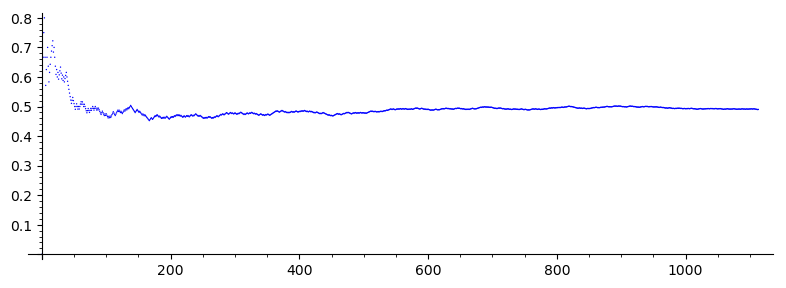

In [37]:
show(points(relFreqsCsBernoulliBallOneOdd, size=1), figsize=[8,3])

We have effectively plotted the maximum likelihood estimate or MLE $\widehat{\theta}_n$ for $\theta$ in our $Bernoulli$ model over increasing values of $n$.

We can also look at the shape of the whole log-likelihood function, not just the value that maximises it.

This interactive plot draws the log-likelihood function for samples based on for different values of $n$.  Again, for $n=1$, you have only observed the first draw, for $n=2$ you have observed two draws, etc etc.

In [38]:
@interact
def _(n=(1..1114)):
    '''Interactive function to plot sample-size specific log likelihood function.'''
    if n == 1:
        print( "Log-likelihood function based on first sample")
    else:
        print( "log-likelihood function based on", n,  "samples"    )
    tn = csBernoulliBallOneOdd[n-1]
    theta = var('theta')
    show(plot((tn * log(theta) + (n - tn) * log(1-theta)), theta,0,1),figsize=[8,3])

Interactive function <function _ at 0x3347119e0> with 1 widget
  n: SelectionSlider(description='n', options=(…

Try changing $n$ to see how the shape of the log-likelihood function changes as we get more and more observations.  

We can also show the log likelihood functions for a number of different value of $n$ all on the same plot.  The first cell below shows log-likelihood functions for $n = 1$ to $n = 20$.  This is where the log-likelihood moves around most as $n$ changes.

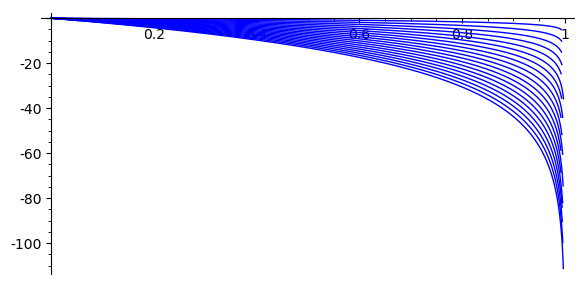

In [57]:
theta = var('theta')
n = 1
tn = csBernoulliBallOneOdd[n-1]
p = plot((tn * log(theta) + (n-tn)*log(1-theta)), theta,0,1)
for n in range(2,20,1):
    Tn = csBernoulliBallOneOdd[n-1]
    p += plot((Tn * log(theta) + (n-Tn)*log(1-theta)), theta,0,1)
show(p, figsize=[6,3])

Looking at larger values of n, we can see the shape of the log-likelihood function settling down as n increases.  Colour has been used to show the changing values of $n$ which result in each curved line on the plot: bluer shades for smaller $n$, moving to red as $n$ increases.  

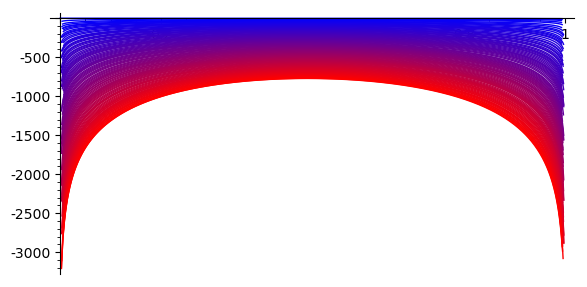

In [58]:
theta = var('theta')
n=1
Tn = csBernoulliBallOneOdd[n-1]
p = plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor=(0,0,1))
for n in range(10,1111,10):
    Tn = csBernoulliBallOneOdd[n-1]
    redshade = 1*n/1114.0
    blueshade = 1 - redshade
    p += plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor = (redshade, 0, blueshade))
n = 1114
p += plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor="red")
show(p,figsize=[6,3])

# Using Sage for Basic Algebra and Calculus

When we wanted to differentiate the log-likelihood $l_n(\theta)$ above, we did it for ourselves, but Sage could have helped us to do even that. 

Sage can be used to find solutions to equations and for basic calculus.  The secret is to create a symbolic expression using the `var(...)` function.  The details of the symbolic rings used for symbolic expressions in Sage are beyond the scope of this course, but they do offer us some useful features. It is probably easiest to think of var as a way to tell Sage that something is a variable name without having to assign that variable to an actual value. Then, using the function  solve  we can solve equations, i.e. use Sage to find the value(s) of a variable which would solve the equation of interest, or expressions for one variable in terms of other variables involved in the equation(s).

The examples used here are taken from the book Sage Tutorial, The Sage Group.

In [59]:
x=1

In [60]:
type(x)

<class 'sage.rings.integer.Integer'>

In [61]:
x = var('x') # symbolic expression
type(x)

<class 'sage.symbolic.expression.Expression'>

In [62]:
?var

In [63]:
?solve

/Users/avelin/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sphinx/util/nodes.py:94: FutureWarning: 
   The iterable returned by Node.traverse()
   will become an iterator instead of a list in Docutils > 0.16.
  for classifier in reversed(node.parent.traverse(nodes.classifier)):


Let's try a simple example, solving $x^2 + 3x + 2 = 0$ for $x$.

In [1]:
solve(x^2 + 3*x + 2, x)

[x == -2, x == -1]

We can also use `solve` if we have variables instead of known values for the coefficients.

In [2]:
x, a, b, c = var('x a b c')
solve([a*(x^2) + b*x + c == 0], x)

[x == -1/2*(b + sqrt(b^2 - 4*a*c))/a, x == -1/2*(b - sqrt(b^2 - 4*a*c))/a]

And we can solve a system of equations for several variables.

In [3]:
x, y = var('x y')
solve([x+y==6, x-y==4], x, y)

[[x == 5, y == 1]]

Sometimes Sage cannot find an exact solution to the equation, as in the following cell:

In [4]:
theta = var('theta')
solve([cos(theta) == sin(theta)], theta)

[sin(theta) == cos(theta)]

Then we can try using the `find_root` function to find a numerical solution.  Note that as well as the equation, you have to pass `find_root(...)` values for the end points of the interval within which you want it to search for the solution.  In this case we are searching within the interval $[0, \frac{\pi}{2}]$.

In [5]:
find_root(cos (theta) == sin(theta), 0, pi/2)

0.7853981633974484

In [6]:
?find_root

We can also use calculus with our symbolic expressions.  We differentiate with the diff function or method.

In [7]:
u = var('u')
diff(sin(u), u)

cos(u)

There are also other ways of differentiating. A symbolic expression has differentiate as a member procedure.

In [8]:
sin(u).differentiate()

cos(u)

In [9]:
sin(u).differentiate(u)

cos(u)

We can also tackle higher derivatives, such as the fourth derivative of $\sin(x^2)$ in the following cell.

In [10]:
x = var('x')
diff(sin(x^2), x, 4)

16*x^4*sin(x^2) - 48*x^2*cos(x^2) - 12*sin(x^2)

In [11]:
sin(x^2).differentiate(4)

16*x^4*sin(x^2) - 48*x^2*cos(x^2) - 12*sin(x^2)

In [12]:
?diff

/Users/avelin/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sphinx/util/nodes.py:94: FutureWarning: 
   The iterable returned by Node.traverse()
   will become an iterator instead of a list in Docutils > 0.16.
  for classifier in reversed(node.parent.traverse(nodes.classifier)):


Partial derivatives can also be found:

In [13]:
x, y = var('x y')
f = x^2 + 17*y^2
f.diff(x) # differentiate f with respect to x

2*x

Let's try a simple example.

In [14]:
x, y = var('x y')
f = x^2 + 17*y^2
f.diff(y) # differentiate f with respect to y

34*y

The `integral(...)` function does integration.

In [15]:
x = var('x')
integral(x*sin(x^2), x)

-1/2*cos(x^2)

What about integrals that dont have closed form solutions?

In [19]:
x = var('x')
integral(e^(x^2),x)

-1/2*I*sqrt(pi)*erf(I*x)

I is the imaginary number

## Symbolic Expressions for the Maximum Likelihood Estimator

We can use these SageMath capabilities to help us to find maximum likelihood estimators.   We will first have to find an expression for the likelihood of the parameter(s) in terms of of some statistic or statistics of the observations.  We then take logs to get a log-likelihood function (since logs are usually easier to work with).  Then, with the Sage diff function and the solve function, we have some powerful tools to then help us to differentiate and find the value at which the differential is 0. 

Let's start with the Bernoulli log-likelihood function $l_n(\theta) = log( L_n(\theta))$ = $t_n$ $log(\theta) $ + $(n-t_n)$ $log(1-\theta)$ and first of all find an expression for the differential of this with respect to $\theta$

In [26]:
theta, n, tn = var('theta n tn')
logL = tn*log(theta) + (n-tn)*log(1-theta) # Bernoulli log likelihood
dlogL = logL.diff(theta)
dlogL

(n - tn)/(theta - 1) + tn/theta

And then solve for $\theta$ when the differential is zero:

In [27]:
solve([dlogL == 0], theta)

[theta == tn/n]

Magic!  We get the expression for $\widehat{\theta}_n$ that we derived before!

### YouTry later

Try `diff`, `integral`, and `solve` on some other functions

(end of You Try)

---

# The Maximum Likelihood Principle

Do we always use the MLE?  No, not always, but we can follow the same principle of using the "most likely" possible value.  

## Example: The Most-Likely of Three Coins

Suppose there are three coins in a bag, but they are not all fair coins.   Using our $Bernoulli$ model for the probability of getting a head on a single toss:

Coin 1 has $\theta = \frac{1}{4}$
Coin 2 has $\theta = \frac{3}{4}$
Coin 3 has $\theta = \frac{1}{2}$
The coins are otherwise identical - you can't tell by look or feel which is which.

You have to choose a single coin from the bag and guess which one it is.  To help your guess, you can toss it three times and observe the results.  Then you make your 'single best guess':  is it Coin 1, Coin 2, or Coin 3?

The experiment

$X_1, X_2, X_3 \overset{IID}{\sim} Bernoulli(\theta^*)$, with $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$

(i.e., our model is  three $Bernoulli$ random variables, independent and identically distributed with true parameter value $\theta^*$ which is known to be one of either $\frac{1}{4}$, $\frac{3}{4}$, or $\frac{1}{2}$.)

Suppose the results of your three tosses are $x_1 = 1$, $x_2 = 0$, $x_3 = 0$ (a head, a tail, a tail)

According to what we have learned so far, the MLE $\widehat{\theta}_3 = \frac{t_n}{n} = \frac{1+0+0}{3} = \frac{1}{3}$

But now we have a problem:  we know that $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$ and $\widehat{\theta}_3 \notin \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$ ($\notin$ means "is not in").

So, the MLE $\widehat{\theta}_n = \frac{t_n}{n} = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$ is not a good idea if we have a finite set of possible values for $\theta$.  Remember that we derived the MLE for the $Bernoulli$ on the continuous parameter space $[0,1]$ ("$\theta^* \in [0,1]$ the true but unknown value ..."),  which is rather different to a situation where $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$, a finite set.

In this situation, we take each of the possible values in the set in turn and say "if $\theta$ was this value, what is the likelihood":

(Coin 1) $L_3(\frac{1}{4} = f(x_1, x_2, x_3;\theta = \frac{1}{4}) = f(1,0,0; \theta = \frac{1}{4}) = \frac{1}{4} \times (1-\frac{1}{4}) \times (1-\frac{1}{4}) = \frac{1}{4} \times \frac{3}{4} \times \frac{3}{4} = \frac{9}{64}$

(Coin 2) $L_3(\frac{3}{4} = f(x_1, x_2, x_3;\theta = \frac{3}{4}) = f(1,0,0; \theta = \frac{3}{4}) = \frac{3}{4} \times (1-\frac{3}{4}) \times (1-\frac{3}{4}) = \frac{3}{4} \times \frac{1}{4} \times \frac{1}{4} = \frac{3}{64}$

(Coin 3) $L_3(\frac{1}{2} = f(x_1, x_2, x_3;\theta = \frac{1}{2}) = f(1,0,0; \theta = \frac{1}{2}) = \frac{1}{2} \times (1-\frac{1}{2}) \times (1-\frac{1}{2}) = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8} = \frac{8}{64}$

So, the "most likely" estimate following the three tosses on the basis of the maximum likelihood principle is $\widehat{\theta}_3 = \frac{1}{4}$ (Coin 1).

## Maximum Likelihood and the $Exponential(\lambda)$ RV

The $Exponential(\lambda)$ random variable is parameterised by $\lambda$.  We have seen that, for a given $\lambda \in (0,\infty)$, an $Exponential(\lambda)$ random variable has the following PDF $f$ and DF of CDF $F$:


$$f(x;\lambda) = \lambda e^{-\lambda x}$$


$$F(x;\lambda) = 1 - e^{-\lambda x}$$

 

### YouTry in class

On paper, try to work out $f(x_1,x_2,\ldots,x_n; \lambda)$, the joint density of $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\lambda)$ remembering that for for $X_1, \ldots, X_n$ IID (independent and identically distributed), the joint density is the product of the individual densities, i.e., $\displaystyle \prod_{i=1}^n f(x_i ; \lambda)$.

Here is the start:

#### Step 1: obtain the expression for $l_n(\lambda)$, the log-likelihood function.

The joint density of $n$ IID $Exponential(\lambda)$ RVs is:

$$
\begin{array}{lcl}
f(x_1,x_2,\ldots,x_n; \lambda) := \displaystyle\prod_{i=1}^n f(x_i ; \lambda) & = & \prod_{i=1}^n \lambda e^{-\lambda x_i}\\ & = & ? \\
\end{array}
$$

<br>
<br>
<br>

- A hint: 
  - $\displaystyle \prod_{i=1}^n \lambda e^{-\lambda x_i} = \left(\displaystyle\prod_{i=1}^n \lambda \right)\left(\displaystyle\prod_{i=1}^n e^{-\lambda x_i} \right)$
- Another hint: 
  - $e^a e^b = e^{a + b}$

When you have obtained the joint density, use it to get the likelihood function $L_n(\lambda) = f(x_1, x_2, \ldots, x_n; \lambda)$ and then you should be able to derive and show that the log-likelihood function for the experiment with $n$ IID $Exponential(\lambda)$ trials is:

$$l_n(\lambda) = \log(L_n(\lambda)) = n\log(\lambda) - \lambda t_n$$
where $t_n = \displaystyle\sum_{i=1}^n x_i$


#### Step 2: Differentiate $l_n(\lambda)$ with respect to $\lambda$, i.e., obtain an expression for $\frac{\partial l_n(\lambda)}{\partial \lambda}$. Try differentiating $l_n(\lambda)$ with respect to $\lambda$.

$$
\begin{array}{lcl}
\frac{\partial l_n(\lambda)}{\partial \lambda} = \frac{\partial}{\partial \lambda} \left(n\log(\lambda) - \lambda t_n \right) & = & ? \\
\end{array}
$$

<br>
<br>
<br>


Compare what you have got with the answer from SageMath using `diff` as done below:

In [78]:
lam, n, tn = var('lam n tn') # remember NOT to assign to lambda as we will overwrite 'lambda' keyword in Python!
logL = log(lam^n) - lam*tn # Exponential log likelihood
dlogL = logL.diff(lam)
dlogL


lam^(n - 1)*n/lam^n - tn

In [79]:
#dlogL.
# uncomment, put the cursor after '.' and hit TAB to see what methods are at your disposal

In [80]:
dlogL.simplify() # the above expression is unsimplified, we can call .simplify() to simplify!

-tn + n/lam

(Note that we can't use a variable name lambda in Sage:  in Sage "lambda" is reserved for a lambda expressions in functional programming - these are the same as anonymous functions in MATLAB that use `@`.)

#### Step 3: Solve for  $\lambda$ in the equation $\frac{\partial l_n(\lambda)}{\partial \lambda} = 0$ to find where $l_n(\lambda)$ has zero slope

This will get us one more step closer the maximum likelihood estimate or MLe $\widehat{\lambda}_n$. This can also be done by hand for easy equations like the one above.


$$
\begin{array}{lcl}
\frac{\partial l_n(\lambda)}{\partial \lambda} = 0 & \iff & \frac{\partial}{\partial \lambda} \left(n\log(\lambda) - \lambda t_n \right) =0 \\
& = & -t_n +\frac{n}{\lambda} = 0 \quad \quad \text{, from Step 2} \\
& = & ... \\
& = & ... \\
& = & \lambda = \frac{n}{t_n}
\end{array}
$$


Compare the above derivation by hand (you should use pencil-paper for example) to the answer from SageMath using `solve`:

In [81]:
solve([dlogL == 0], lam)

[lam == n/tn]

#### Step 4: Show that the $\lambda$ at which $\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) = 0$ is indeed a maximum by checking that the second derivative $\frac{\partial}{\partial \lambda} \left(\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) \right)<0$ at this $\lambda$

Let us start doing this on pencil-paper by starting as follows:

$$
\begin{array}{lcl}
\frac{\partial}{\partial \lambda} \left(\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) \right) 
& = & \frac{\partial}{\partial \lambda} \left( -t_n +\frac{n}{\lambda} \right) \quad \quad \text{, from Step 2} \\
& = & ... \\
& = & ... \\
& = & ... \\
& = & - \frac{n}{\lambda^2}
\end{array}
$$

We now know that $\lambda > 0$ so the above expression will always be negative and we have a maximum at $\lambda=\frac{n}{t_n}$. And we can conclude that $\widehat{\lambda}_n$, i.e., the MLe or maximum likelihood estimate is indeed:

$$
\widehat{\lambda}_n = \frac{n}{t_n}, \qquad \text{where,} \quad t_n=\sum_{i=1}^{n}x_i
$$

But, more generally in MLe problems, you need to do the extra work to check that $\frac{\partial}{\partial \lambda} \left(\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) \right)<0$ at the $\lambda$ where the slope is $0$. So let's go ahead and do this even for this simple problem so that Step 4 is actually complete.

Our task now is to confirm that $\widehat{\lambda}_n = \frac{n}{t_n}$ is indeed the MLe by checking that:

$$
\left. \frac{\partial}{\partial \lambda} \left(\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) \right) \right\vert_{\lambda=\widehat{\lambda}_n} < 0
$$

Here is the start of doing this on pencil-paper:

$$
\begin{array}{lcl}
\left. \frac{\partial}{\partial \lambda} \left(\frac{\partial}{\partial \lambda} \left( l_n(\lambda)\right) \right) \right\vert_{\lambda=\widehat{\lambda}_n}
& = & \frac{\partial}{\partial \lambda} \left( -t_n +\frac{n}{\lambda} \right) \quad \quad \text{, from Step 2} \\
& = & ... \\
& = & ... \\
& = & ... \\
& = & - \frac{t_n^2}{n} \qquad \text{, which is always negative as long since } t_n=\sum_{i=1}^{n} x_i > 0 \text{ and } n \geq 1.
\end{array}
$$

Thus we have shown in **four steps** that that the maximum likelihood estimate or MLe is indeed $\widehat{\lambda}_n = \frac{n}{t_n} = \frac{n}{\sum_{i=1}^n x_i}$.

*You can expect such a problem in the exam, and in assignment 3.*
 

In [82]:
# Here we are doing all the previous steps
lam, n, tn = var('lam n tn') # remember NOT to assign to lambda as we will overwrite 'lambda' keyword in Python!
logL = log(lam^n) - lam*tn # Exponential log likelihood - this is something you need to derive for the problem
dlogL = logL.diff(lam).simplify() # first derivative
d2logL = logL.diff(lam,2).simplify() # second derivative
d2logL


(n - 1)*n/lam^2 - n^2/lam^2

In [83]:
d2logL = logL.diff(lam,2).full_simplify() # sometimes you may need .full_simplify() method
d2logL # this can also be done by hand

-n/lam^2

In [84]:
# evaluating the second derivative of the log likelihood function 
# by substituting lam=n/tn, the MLe, via .subs(...) method 
# ... see d2logL.subs? for details
d2logL.subs(lam=n/tn) 

-tn^2/n

In [85]:
#d2logL.subs? # use the force / source Luke

(end of YouTry)

---

# Sample Exam Problem 1 with Solution

Repeat the four steps shown above for the derivation of the maximum likelihood estimate for data from $n$ IID $Exponential(\lambda)$ trials above, but for the random variable with the following probability density function:

$$
f(x; \lambda) = \frac{1}{2} \lambda^3 x^2 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

Complete the basic four steps to compute the MLe of $\lambda$ based on $n$ IID samples $X_1,X_2,\ldots,X_n \sim f(x;\lambda)$. Here we can easily use the symbolic expressions in SageMath to find the expression for the log-likelihood value of each $x_i$ and then do the sum from $1$ to $n$ in our head.

**NOTE:** It might be easier to do this by hand on a pencil and paper! You just need to write a function `MLeForSampleExamProblem1(x)` in the end that returns the MLe for a given input observation `x` = $(x_1,x_2,\ldots,x_n)$

Now, evaluate the log-likelihood function given by 
$$\log \left( \prod_{i=1}^n f(x_i;\lambda) \right) = \sum_{i=1}^n \log \left( f(x_i; \lambda) \right) $$
for each term $x_i$.

In [86]:
lam, n, x_i = var('lam n x_i') # setup the variables 
fxi = lam^3*x_i^2*exp(-lam*x_i)/2 # get the pdf as a symbolic expression f
logfxi = log(fxi) # log of pdf
logfxi.log_expand() # expanding the log(f) gives log likelihood for each data point x_i

-lam*x_i - log(2) + 3*log(lam) + 2*log(x_i)

In [87]:
# take the derivative w.r.t lam, the parameter
dLogfxi = diff(logfxi,lam).full_simplify()
dLogfxi

-(lam*x_i - 3)/lam

In [88]:
# summing over n samples and setting it equal to 0 and solving for lam gives
lamHat,tn = var('lamHat', 'tn') # declare two more variables, here tn = sum x_i or the sample sum
lamHat = 3*n/tn

In [89]:
# now evaluate the second derivate for each term in the log likelihood w.r.t lam
d2Logfxi = diff(logfxi,lam,2).full_simplify()
d2Logfxi

-3/lam^2

In [90]:
# the second derivate is negative since lam > 0, and lamHat is indeed MLE, but we can go one step further
# since sample sum is always positive the second derivate at MLe lanHat < 0 and we have a maximum
d2Logfxi.subs(lam = lamHat)

-1/3*tn^2/n^2

In [91]:
# create a function that returns the MLe for this problem
def MLeForSampleExamProblem1(x):
    '''returns the MLe for the Sample Exam Problem 1 where x is a sample of n data points in a list'''
    tn=sum(x) # get the sample sum statistics
    n=len(x)
    return 3*n/tn

In [92]:
MLeForSampleExamProblem1([2.7,2.1,3.8])

1.04651162790698

In [93]:
assert(MLeForSampleExamProblem1([2.7,2.1,3.8]).n(digits=3) == 1.0465) 
# assert that the Mle is correct on a small test input data

---
## Assignment 3, PROBLEM 1
Maximum Points = 1


Using the steps in the Sample Exam Problem 1 with Solution in notebook `09.ipynb`, derive the maximum likelihood estimate for $n$ IID samples from a random variable with the following probability density function:
$$
f(x; \lambda) = \frac{1}{24} \lambda^5 x^4 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

You can solve the MLe by hand (using pencil paper or using key-strokes). Present your solution as the return value of a function called `def MLeForAssignment3Problem1(x)`, where `x` is a list of $n$ input data points.

In [94]:
# do not change the name of the function, just replace XXX with the appropriate expressions for the MLe
def MLeForAssignment3Problem1(x):
    '''write comment of what this function does'''
    XXX 
    XXX
    return XXX

# Example: New Zealand Earth Quakes

We will obtain inter-EQ times from the csv file and then obtain the MLE under an IID $Exponential$ model.

## Step 1: Processing Timestamps and Floats with Try-Catch and more...

We want to get a list earthquake times as a Unix time number for earthquakes occurrence times.
    
Date as `origintime` is the 2nd column of the csv file of NZ Earth Quakes we downloaded in `data/earthquakes.csv`.
    
We will makw a function `makeQuakeTimes` to returns a list of occurrence times.
Next we can get the time between occurrence of earthquakes as a Unix time number.
Unix time starts at 1.1.1970; the Unix time number counts seconds since 1.1.1970.

First let's take a look at the file: where it is, how many lies it has and the first three lines using BASH commands below, repsectively.

In [97]:
%%sh
ls data
wc -l data/earthquakes.csv
head -3 data/earthquakes.csv

NYPowerBall.csv
co2_mm_mlo.txt
earthquakes.csv
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
pride_and_prejudice.txt
rainfallInChristchurch.csv
   21017 data/earthquakes.csv
publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0
2018p368878,,2018-05-17T11:38:24.646Z,2018-05-17T11:40:26.254Z,177.8775115,-37.46115663,2.155154561,58.4375,M,,NonLinLoc,,automatic,nz3drx,11,11,7,0.3083220739,232.7487132,0.842884174,0


### Handling time-stamps in Python - in a big hurry!

Dive into the following for details:
- [https://docs.python.org/2/library/datetime.html](https://docs.python.org/2/library/datetime.html) 
- [https://docs.python.org/2/library/time.html](https://docs.python.org/2/library/time.html)

In [98]:
from datetime import datetime # import datetime module

# create some date strings that are simple
string_dates = ['7/2/2011', '8/6/2012', '11/13/2013', '5/26/2011', '5/2/2001']

In [99]:
# listcomp using striptime method that takes a format string we can specify
dateTimesList = [datetime.strptime(ts, '%m/%d/%Y') for ts in string_dates]

# this gives datetime objects with year, month, day and hour and minutes set to 0
dateTimesList

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [100]:
# But we want to convert these datetime objects into a number - unix time number

import time # need this for our purpose

[time.mktime(ds.timetuple()) for ds in dateTimesList]

[1309557600.0, 1344204000.0, 1384297200.0, 1306360800.0, 988754400.0]

In [101]:
# let's do it all at once
from datetime import datetime
import time
[time.mktime(datetime.strptime(ts, '%m/%d/%Y').timetuple()) for ts in string_dates]

[1309557600.0, 1344204000.0, 1384297200.0, 1306360800.0, 988754400.0]

In [102]:
# use parse in dateutil.parser to try to auto-covert common time formats
from dateutil.parser import parse
[parse(ts) for ts in string_dates]

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [103]:
# Let's see if parse works on our EQ time stamps 
parse('2018-05-17T12:19:35.516Z').timetuple()

time.struct_time(tm_year=2018, tm_mon=5, tm_mday=17, tm_hour=12, tm_min=19, tm_sec=35, tm_wday=3, tm_yday=137, tm_isdst=0)

In [104]:
# So we can just use parse in a listcomp like this
EQ_string_dates = ['2018-05-17T12:19:35.516Z','2018-05-17T11:38:24.646Z']
[parse(ts) for ts in EQ_string_dates]

[datetime.datetime(2018, 5, 17, 12, 19, 35, 516000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 17, 11, 38, 24, 646000, tzinfo=tzutc())]

In [105]:
#Finally all in one
from datetime import datetime
import time
from dateutil.parser import parse

EQ_string_dates = ['2018-05-17T12:19:35.516Z','2018-05-17T11:38:24.646Z']
[time.mktime(parse(ts).timetuple()) for ts in EQ_string_dates]

[1526555975.0, 1526553504.0]

Now we need to read in the csv file and grab the fields we want.

Here are the nuts and bots of this process - without using overly auto-magic file readers.

In [106]:
with open("data/earthquakes.csv") as f:
    reader = f.read()
    
dataList = reader.split('\n')
len(dataList)

21018

In [107]:
dataList[0]

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty'

In [108]:
dataList[1]

'2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0'

In [109]:
dataList[21017] # looks like the last line is empty!

''

In [110]:
dataList[-2] # but the second-last line looks okay

'2017p408120,earthquake,2017-06-01T00:07:04.890Z,2017-06-01T07:20:23.994Z,175.4930025,-39.31558765,1.298107247,13.5546875,M,,NonLinLoc,confirmed,manual,nz3drx,28,19,13,0.04550182409,86.69529793,0.2189521352,0'

In [114]:
from datetime import datetime
import time
from dateutil.parser import parse

myDataAccumulatorList =[]
for data in dataList[1:-1]:
    dataRow = data.split(',')
    myTimeString = dataRow[2] # origintime
    # let's also grab longitude, latitude, magnitude, depth
    myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
    try: 
        myTypedTime = time.mktime(parse(myTimeString).timetuple())
        myFloatData = [float(x) for x in myDataString]
        myFloatData.append(myTypedTime) # append the processed timestamp
        myDataAccumulatorList.append(myFloatData)
    except TypeError as e: # error handling for type incompatibilities
        print ('Error:  Error is ', e)

In [115]:
len(myDataAccumulatorList)

21016

In [116]:
myDataAccumulatorList[0:5] # so all looks okay!

[[178.4653957, -37.51944533, 2.209351541, 20.9375, 1526555975.0],
 [177.8775115, -37.46115663, 2.155154561, 58.4375, 1526553504.0],
 [173.2372626, -41.23518154, 2.253095604, 84.6875, 1526550406.0],
 [173.6257813, -42.31633991, 2.177032628, 10.15625, 1526547706.0],
 [174.0910246, -40.24770738, 2.795031407, 79.53125, 1526546404.0]]

Now let's be good programmers and wrap all of this bits and bobs into a function.

In [118]:
def getLonLatMagDepTimes(NZEQCsvFileName):
    '''returns longitude, latitude, magnitude, depth and the origin time as unix time
    for each observed earthquake in the csv filr named NZEQCsvFileName'''
    from datetime import datetime
    import time
    from dateutil.parser import parse
    import numpy as np
    
    with open(NZEQCsvFileName) as f:
        reader = f.read() 
        dataList = reader.split('\n')
        
    myDataAccumulatorList =[]
    for data in dataList[1:-1]:
        dataRow = data.split(',')
        myTimeString = dataRow[2] # origintime
        # let's also grab longitude, latitude, magnitude, depth
        myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
        try: 
            myTypedTime = time.mktime(parse(myTimeString).timetuple())
            myFloatData = [float(x) for x in myDataString]
            myFloatData.append(myTypedTime) # append the processed timestamp
            myDataAccumulatorList.append(myFloatData)
        except TypeError as e: # error handling for type incompatibilities
            print ('Error:  Error is ', e)
    return np.array(myDataAccumulatorList)

In [119]:
myProcessedArray = getLonLatMagDepTimes('data/earthquakes.csv')

In [120]:
myProcessedArray.shape

(21016, 5)

In [121]:
myProcessedArray[0:5,:] # so all looks okay!

array([[ 1.78465396e+02, -3.75194453e+01,  2.20935154e+00,
         2.09375000e+01,  1.52655598e+09],
       [ 1.77877511e+02, -3.74611566e+01,  2.15515456e+00,
         5.84375000e+01,  1.52655350e+09],
       [ 1.73237263e+02, -4.12351815e+01,  2.25309560e+00,
         8.46875000e+01,  1.52655041e+09],
       [ 1.73625781e+02, -4.23163399e+01,  2.17703263e+00,
         1.01562500e+01,  1.52654771e+09],
       [ 1.74091025e+02, -4.02477074e+01,  2.79503141e+00,
         7.95312500e+01,  1.52654640e+09]])

In [122]:
def interQuakeTimes(quakeTimes):
    '''Return a list inter-earthquake times in seconds from earthquake origin times
    Date and time elements are expected to be in the 5th column of the array
    Return a list of inter-quake times in seconds. NEEDS sorted quakeTimes Data'''
    import numpy as np
    retList = []
    if len(quakeTimes) > 1:
        retList = [quakeTimes[i]-quakeTimes[i-1] for i in range(1,len(quakeTimes))]
    return np.array(retList)

In [123]:
sorted(myProcessedArray[0:5,4]) # the time-stamps in file are not ordered

[1526546404.0, 1526547706.0, 1526550406.0, 1526553504.0, 1526555975.0]

In [124]:
interQuakeTimes(sorted(myProcessedArray[0:5,4]))

array([1302., 2700., 3098., 2471.])

Finally we have the inter-EQ times in seconds as a numpy array `interQuakesSecs`.

In [125]:
interQuakesSecs = interQuakeTimes(sorted(myProcessedArray[:,4]))
len(interQuakesSecs)

21015

It is time to make a model for these inter-EQ times, i.e., go from the observed data to the best fitting parameter of a simple model!

## Step 2: Modeling Inter-earthquake Times for New Zealand Earthquakes

The $Exponential$ is often suitable for modelling the time between occurences of some event, like the time between buses at a bus-stop.  We could try to model the inter-earthquake times of New Zealand earthquakes as IID $Exponential(\lambda^*)$ random variables and use our earthquakes data to calculate an MLE for $\lambda^*$.

In [126]:
interQuakesSecs[0:10] # first ten inter-EQ times

array([ 531.,  551.,  764.,  294.,  678., 1538.,  376.,  364.,  208.,
        242.])

In [127]:
interQuakesSecs.mean() # sample mean inter-quake times

1441.0635736378777

In [128]:
interQuakesSecs.mean()/60.0 # sample mean in minutes

24.01772622729796

In [129]:
interQuakesSecs.var() # sample variance

2488808.0126131633

In [130]:
interQuakesSecs.std()/60.0 # sample std in seconds

26.29326071561327

Our (very simplistic) model is:

$X_1, X_2, \ldots, X_n \overset{IID}{\sim} Exponential(\lambda^*)$ 

with observations $x_1, x_2, \ldots, x_n$ in the array `interQuakesSecs` and $n$ the number of elements in the list.

The sum function can tell us $t_n = \displaystyle\sum_{i=1}^n x_i$

In [131]:
sum(interQuakesSecs)

30283951.0

We can get a quick look at the shape of the data using a histogram:

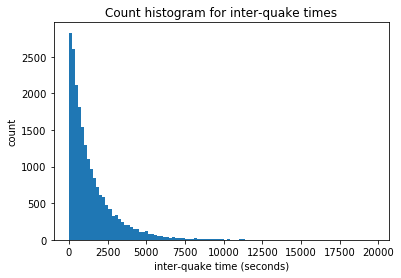

In [132]:
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(interQuakesSecs, 100) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (seconds)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
pylab.show() # and finally show it

Our 'best single guess' or point estimate $\widehat{\lambda}_n$ of the unknown $\lambda^* \in (0,\infty)$ is $\frac{n}{t_n}$

In [133]:
n = len(interQuakesSecs)
tn = sum(interQuakesSecs)
bestGuessSecs = n/tn # MLe
bestGuessSecs

0.0006939319113282148

Can you see how $\widehat{\lambda}_n$ relates to the sample mean?  Think about the Expectation of an $Exponential$ RV.

In [134]:
interQuakesSecs.mean() # mean inter-earthquake times in seconds again

1441.0635736378777

In [135]:
1/bestGuessSecs

1441.0635736378777

What about converting our data to give the inter-quake times in minutes rather than seconds:

In [136]:
import numpy as np
interQuakesMins = np.array([t/60 for t in interQuakesSecs])

And getting the best guess for $\lambda^*$ with the units as minutes:

In [137]:
n = len(interQuakesMins)
tn = sum(interQuakesMins)
bestGuessMins = n/tn
bestGuessMins

0.04163591467969288

Can you see how $\widehat{\lambda}_n$ relates to the sample mean?  Think about the Expectation of an $Exponential$ RV.

In [138]:
interQuakesMins.mean() # mean inter-earthquake times in minutes

24.017726227297963

In [139]:
1/bestGuessMins

24.017726227297963

What about the relationship between the best guess values for $\lambda^*$ when we are measuring time in different units.  Does this fit with the idea of $\lambda$ as a "rate"?

In [140]:
bestGuessSecs*60

0.04163591467969289

In [141]:
interQuakesMins.sum()

504732.51666666666

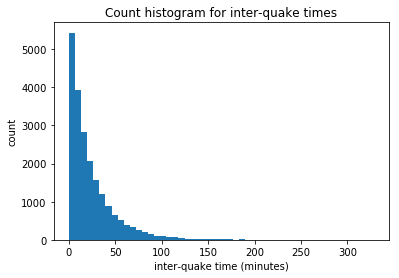

In [142]:
pylab.clf() # clear current figure
t = np.arange(0.0000000000001, 1000., 0.01)
n, bins, patches = pylab.hist(interQuakesMins, 50) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (minutes)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
pylab.show() # and finally show it

### Some pointers on plotting in SageMath and Python

Here is a simple plot with three functions.

And the following one uses the histogram above and plots another function on top of it. These and more examples are from:

- [https://matplotlib.org/2.0.1/index.html](https://matplotlib.org/2.0.1/index.html)
- specifically from: [https://matplotlib.org/2.0.1/examples/pyplots/pyplot_three.html](https://matplotlib.org/2.0.1/examples/pyplots/pyplot_three.html)

Check out the matplotlib gallery:

- [https://matplotlib.org/2.0.1/gallery.html](https://matplotlib.org/2.0.1/gallery.html)

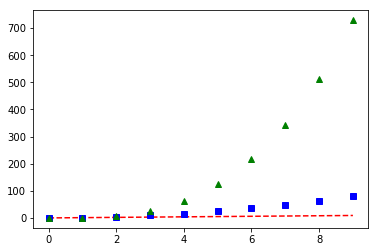

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0.0000000000001, 10., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

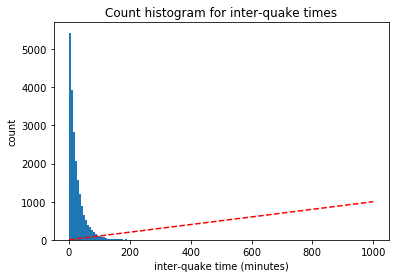

In [144]:
pylab.clf() # clear current figure
t = np.arange(0.0000000000001, 1000., 0.01)
n, bins, patches = pylab.hist(interQuakesMins, 50) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (minutes)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
# red dashes superimposed on histogram
pylab.plot(t, t, 'r--')
pylab.show() # and finally show it

## YouTry (later)

If you have time and you want to do more with Sage symbolic expressions, have a look at this optional section.  You should only start it when you are happy with the essential material above. 

Try solving a system of equations:

In [145]:
var('x y p q')
eq1 = p + q == 9
eq2 = q*y + p*x == -6
eq3 = q*y^2 + p*x^2 == 24
solve([eq1, eq2, eq3, p==1], p, q, x, y)

[[p == 1, q == 8, x == -4/3*sqrt(10) - 2/3, y == 1/6*sqrt(10) - 2/3], [p == 1, q == 8, x == 4/3*sqrt(10) - 2/3, y == -1/6*sqrt(10) - 2/3]]

If you look at the documentation for the `solve(...)` function, you'll see that you have the option of returning a list of dictionaries of the solutions.  

Think about that:  a list of dictionaries of the solutions.  

So, there can be more than one combination of variable values that can provide a solution, and a convenient way to indicate the values of each variable within each 'solving combination' is using a dictionary which maps a value to a variable (key).  

In [146]:
?solve

/Users/avelin/opt/miniconda3/envs/sage/lib/python3.7/site-packages/sphinx/util/nodes.py:94: FutureWarning: 
   The iterable returned by Node.traverse()
   will become an iterator instead of a list in Docutils > 0.16.
  for classifier in reversed(node.parent.traverse(nodes.classifier)):


In [147]:
solns = solve([eq1, eq2, eq3, p==1], p, q, x, y, solution_dict = true)
solns

[{p: 1, q: 8, x: -4/3*sqrt(10) - 2/3, y: 1/6*sqrt(10) - 2/3},
 {p: 1, q: 8, x: 4/3*sqrt(10) - 2/3, y: -1/6*sqrt(10) - 2/3}]

When we have the list of dictionaries of the solutions, we can have a look at the values.  The following cell uses a list comprehension to take each dictionary in the list and find the values mapped to each variable.  

In [148]:
[[s[p].n(digits=10), s[q].n(digits=10), s[x].n(digits=10), s[y].n(digits=10)] \
                                                                        for s in solns]

[[1.000000000, 8.000000000, -4.883036880, -0.1396203900],
 [1.000000000, 8.000000000, 3.549703547, -1.193712943]]

Try some other systems of equations, or other features which catch your eye in the help page. 

## Take the Feature Tour of SageMath Now!

[http://www.sagemath.org/tour.html](http://www.sagemath.org/tour.html)

# Sample Exam Problem 2 

Modeling the number of EQs $X$ with magnitude $M \in [2.0,7.0]$ during the entire period of observation of length $T$ minutes by using the following model:

- $X \sim Poisson(\lambda^* T)$ where $\lambda^* T = E(X) = \mu$, $T$ is the length of the observation period and $\lambda^*$ is the parameter of interest (it is the per-minute rate of observing an EQ with magnitude in the given range).

Recall that the probability mass function for the $Poisson(\mu)$ RV is:

$$
f(x;\mu) = \displaystyle{\frac{\mu^x \exp(-\mu)}{x!}}, \quad \text{ where, } \mu \in (0,\infty) \cap \mathbb{R} \ \text{ and } x \in \{0,1,2,\ldots\}
$$

This problem has two basic tasks:

1. **Task_DATA:** Get the data for the model, i.e., find $X$ the number of EQs with magnitude in $[2.0,7.0]$ during the observation period of length $T$.
- **TASK_MLE** Get the MLE of the unknown mean parameter $\lambda$ using the observed $X$ and $T$ by deriving the MLE.
  - first get the MLE for $\mu$ using the log-likelihood function for $X \sim Poisson(\mu)$, with just one observation.
  - once you get the MLE for $\mu$ then substitute in $\mu=\lambda T$ and solve for $\lambda$ to het MLE for $\lambda^*$ 



In [150]:
# Sample Exam Problem 2 

# This is a REQUIRED-CELL for this Problem - so EVALUATE it first! - such cells will be given in the exam.
# 1. Get the Data (usually this will be given for you so Step. 2 can proceed if Step. 1 is wrong)

#### Do NOT modify the next 2 functions from above (09.ipynb)
def getLonLatMagDepTimes(NZEQCsvFileName):
    '''returns longitude, latitude, magnitude, depth and the origin time as unix time
    for each observed earthquake in the csv filr named NZEQCsvFileName'''
    from datetime import datetime
    import time
    from dateutil.parser import parse
    import numpy as np
    
    with open(NZEQCsvFileName) as f:
        reader = f.read() 
        dataList = reader.split('\n')
        
    myDataAccumulatorList =[]
    for data in dataList[1:-1]:
        dataRow = data.split(',')
        myTimeString = dataRow[2] # origintime
        # let's also grab longitude, latitude, magnitude, depth
        myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
        try: 
            myTypedTime = time.mktime(parse(myTimeString).timetuple())
            myFloatData = [float(x) for x in myDataString]
            myFloatData.append(myTypedTime) # append the processed timestamp
            myDataAccumulatorList.append(myFloatData)
        except TypeError as e: # error handling for type incompatibilities
            print ('Error:  Error is ', e)
    #return np.array(myDataAccumulatorList)
    return myDataAccumulatorList

myProcessedList = getLonLatMagDepTimes('data/earthquakes.csv')

def interQuakeTimes(quakeTimes):
    '''Return a list inter-earthquake times in seconds from earthquake origin times
    Date and time elements are expected to be in the 5th column of the array
    Return a list of inter-quake times in seconds. NEEDS sorted quakeTimes Data'''
    import numpy as np
    retList = []
    if len(quakeTimes) > 1:
        retList = [quakeTimes[i]-quakeTimes[i-1] for i in range(1,len(quakeTimes))]
    #return np.array(retList)
    return retList

import numpy as np
interQuakesSecs = interQuakeTimes(sorted([x[4] for x in myProcessedList]))
iQMinutes = np.array(interQuakesSecs)/60.0 # inter-quake time in minutes
assert(len(iQMinutes)==21015)

In [153]:
# Sample Exam Problem 2

# EVALUATE the REQUIRED-CELL above for this Problem!
# do not change the name of the variable or functions, just replace XXX with the appropriate expressions

# 1. TASK_DATA Get the Data (usually this will be given for you so Step. 2 can proceed if Step. 1 is wrong)

# get X
X_NumberOfEQsOfTheRequiredMagnitude = XXX 

# get T
startObservationTimeInMinutes = XXX 
endObservationTimeInMinutes = XXX 
T_durationOfObservationInMinutes = XXX - XXX 

# you can check here, as part 1 is needed for part 2 of getting MLE 
assert(X_NumberOfEQsOfTheRequiredMagnitude>10900 and floor(T_durationOfObservationInMinutes)==floor(504732.5)) 

# this is what you have found as values for X and T
print ("data: (X, T) = ",(X_NumberOfEQsOfTheRequiredMagnitude, T_durationOfObservationInMinutes))


# 2. Task_MLE: Get the MLE of lambda*

def getMLeForSampleExamProblem2(x,t):
    '''write what this function is supposed to do'''
    XXX 
    XXX
    return XXX

# POSSIBLY USEFUL HINT: x! = factorial(x) when x=var('x'), i.e when x is a variable

# do NOT change anything below
# Use the following values when applying the expression for the MLE
X_NumberOfEQsOfTheRequiredMagnitude=10910 
T_durationOfObservationInMinutes=504732.52 

MLeForSampleExamProblem2 = getMLeForSampleExamProblem2(X_NumberOfEQsOfTheRequiredMagnitude,\
                                                       T_durationOfObservationInMinutes)
print (MLeForSampleExamProblem2)

NameError: name 'XXX' is not defined

# Sample Exam Problem 2 with Solution

In [154]:
# Sample Exam Problem 2 with Solution

# EVALUATE the REQUIRED-CELL above for this Problem!

# 1. TASK_DATA Get the Data (usually this will be given for you so Step. 2 can proceed if Step. 1 is wrong)

# get X, recall index 2 is magnitude in myProcessedList and we are doing a conditional listcomp
X_NumberOfEQsOfTheRequiredMagnitude = len([x[2] for x in myProcessedList if x[2]>2 and x[2]<7])

# get T, just get the start and end time in minutes and differnce to get length of observation period
startObservationTimeInMinutes = min([x[4] for x in myProcessedList])/60 # divide by 60 for minutes
endObservationTimeInMinutes = max([x[4] for x in myProcessedList])/60 # divide by 60 for minutes
T_durationOfObservationInMinutes = endObservationTimeInMinutes - startObservationTimeInMinutes

# you can check here, as part 1 is needed for part 2 of getting MLE 
assert(X_NumberOfEQsOfTheRequiredMagnitude>10900 and floor(T_durationOfObservationInMinutes)==floor(504732.5)) 

# this is what you have found as values for X and T
print ("data: (X, T) = ",(X_NumberOfEQsOfTheRequiredMagnitude, T_durationOfObservationInMinutes))

# 2. Task_MLE: Get the MLE of lambda*

def getMLeForSampleExamProblem2(x,t):
    '''finds the MLE of lambda* for the Poisson(lambda* T) model for EQs with Magnitude in [2,7]'''
    # see a possible symbolic attack below, also see the pencil-paper work you could do
    return x/t

# do NOT change anything below
# Use the following values when applying the expression for the MLE
X_NumberOfEQsOfTheRequiredMagnitude=10910 
T_durationOfObservationInMinutes=504732.52 

MLeForSampleExamProblem2 = getMLeForSampleExamProblem2(X_NumberOfEQsOfTheRequiredMagnitude,\
                                                       T_durationOfObservationInMinutes)
MLeForSampleExamProblem2

data: (X, T) =  (10909, 504732.5166666657)


0.0216154092864870

In [156]:
# Sample Exam Problem 2 with Solution
# this problem can be immediately done by hand in a couple lines on paper 
# (see Raaz during open Office Hours, if you can't)
# here is ONE POSSIBLE way to get the solution using symbolic tools in sageMath
# you only need to give the right answer in the function MLeForSampleExamProblem2
# do it by hand to make sure you understand this simple differentiaion of the log likelihood function
mu,x = var('mu,x') 
logLklPoisson = log((mu)^x*exp(-mu)/factorial(x)).full_simplify() # get log-likelihood expression
print (logLklPoisson)
dLogLPoisson = logLklPoisson.diff(mu).full_simplify() # get first derivative w.r.t. mu
print (dLogLPoisson)
d2LogLPoisson = logLklPoisson.diff(mu, 2).full_simplify() # get second derivative w.r.t. mu
print (d2LogLPoisson)
print (solve(dLogLPoisson == 0, mu) )
print (d2LogLPoisson.subs(mu=x)) # since X>=0 this expression is negative if we have at least one observation
lam,T= var('lam,T') # declare the variable for our problem,and just substitue mu=lam*T for our problem
print (solve(x == lam*T, lam)) # MLE of lambda is x/T

log(mu^x*e^(-mu)/factorial(x))
-(mu - x)/mu
-x/mu^2
[
mu == x
]
-1/x
[
lam == x/T
]


### Why is this useful?

Note that $1-P(X=0)$ is the probability that at least one EQ with magnitude in $[2,7]$ occurs in any 1-minute-long interval of time based on our estimated model (this model is called the *time-homogeneous Poisson process*). 

Such probabilities (even under such base-line or simplest Poisson models) can be useful for making predictions and planning civil engineering projects.

In [158]:
MLeForSampleExamProblem2=0.0216154092864870 # MLE of our lambda* per minute
print( "Probability of at least one EQ with magnitude in [2,7] per minute is = ",1-exp(-MLeForSampleExamProblem2))

# these two expressions are equal to 1-P(X=0), X ~ Poisson(mu = lambda * 1), lambda=MLeForSampleExamProblem2
1-MLeForSampleExamProblem2^0*exp(-MLeForSampleExamProblem2)/factorial(0) == 1-exp(-MLeForSampleExamProblem2)

print( "Probability of at least one EQ with magnitude in [2,7] per day is = ",1-exp(-MLeForSampleExamProblem2*24*60))


Probability of at least one EQ with magnitude in [2,7] per minute is =  0.0213834704837642
Probability of at least one EQ with magnitude in [2,7] per day is =  0.999999999999970


---
## Assignment 3, PROBLEM 2
Maximum Points = 2


Joshua Fenemore collected data in 2007 on waiting times at the Orbiter bus-stop close to University of Canterbury, Christchurch, New Zealand.
The sampled waiting times at the bus-stop, i.e., the inter-arrival time between consecutive buses, were recored in units of nearest minute and are given in the list `sampleWaitingTimes` below.

Your **task** is to assume that the inter-arrival time between Orbiter buses is independent and identically distributed according to $Exponential(\lambda)$ random variable and write a generic function:

- called `mleOfExponetialLambdaRVFromIIDSamples(samples)`,
- where `samples` is a `list` of  data points assumed to be drawn from IID  $Exponential(\lambda)$ random variable,
- such that, the function returns the maximum likelihood estimate or MLe $\widehat{\lambda}_n$ of the unknown rate parameter $\lambda$ 
- finally get the MLe for Joshua's data by calling your function on his samples as follows:
  - `mleOfRateParameterForOrbiterWaitingTimes = mleOfExponetialLambdaRVFromIIDSamples(sampleWaitingTimes)`

(NOTE: The MLe for this model was already derived "above", i.e., in `09.ipynb`, so you can directly use this expression to complete your task).

In [159]:
# do not change the sampled data-points in sampleWaitingTimes
sampleWaitingTimes=[8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                    8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                    0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                    6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1]
# do not change the next line, but just replace XXX - 1 POINT
# in the body of the function to complete your task
def mleOfExponetialLambdaRVFromIIDSamples(samples):
    '''XXX'''
    XXX
    XXX
    return XXX

# You should not change anything in the line below - 1 POINT
mleOfRateParameterForOrbiterWaitingTimes = mleOfExponetialLambdaRVFromIIDSamples(sampleWaitingTimes)

NameError: name 'XXX' is not defined

# Numerical Optimisation for Finding MLE

Instead of analytically (by pencil/paper) or symbolically (with SageMath) solving for the MLe of the parameter from the log-likelihood function, we can use numerical optimisation methods in SageMath/Python.

The main function we need with multiple optimisation methods is the following:

- [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

Here is a brief of the doc:


scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]
Minimization of scalar function of one or more variables.

Parameters:	
fun : callable
The objective function to be minimized.

fun(x, *args) -> float

where x is an 1-D array with shape (n,) and args is a tuple of the fixed parameters needed to completely specify the function.

x0 : ndarray, shape (n,)
Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.

args : tuple, optional
Extra arguments passed to the objective function and its derivatives (fun, jac and hess functions).

method : str or callable, optional
Type of solver. Should be one of

- ‘Nelder-Mead’ ([see here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead))
- ...
- ‘BFGS’ ([see here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs))
- ‘Newton-CG’ ([see here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-newtoncg.html#optimize-minimize-newtoncg))
- ‘L-BFGS-B’ ([see here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb))
- ...
- ‘SLSQP’ ([see here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html#optimize-minimize-slsqp))
- ...

custom - a callable object (added in version 0.14.0), see below for description.
If not given, chosen to be one of BFGS, L-BFGS-B, SLSQP, depending if the problem has constraints or bounds.


# A great set of lectures in Optimisation in next URL

You have seen some methods in scientific computing and will see more in your programme.

Here we just use some basic methods in numerical optimisation to be able to find the maximum likelihood estimate.

Note that in optimisation one is interested in minimising a cost or loss, so we need to recast MLe problem as minimising negative of the log likelihood function:

$$argmax_{\theta \in \mathbf{\Theta}} \log(L(\theta)) = argmin_{\theta \in \mathbf{\Theta}} - \log(L(\theta))$$

In [162]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL("https://scipy-lectures.org/advanced/mathematical_optimization/index.html",500)

### 2.7.2.1. Getting started: 1D Optimisation

This example is from https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id38

> Let’s get started by finding the minimum of the scalar function $f(x)=\exp(x-0.7)^2$. 
> `scipy.optimize.minimize_scalar()` uses Brent’s method to find the minimum of a function

See [docs for `scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

In [163]:
# Example from https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id38

import numpy as np # import numpy for np.methods
# import optimize from scipy to do numerical optimization
from scipy import optimize

#define the function f we want to minimize - see points plot below
def f(x):
    return -np.exp(-(x - 0.7)**2)

#call the optimize.minimize_scalar method to find the minimim, argmin, etc.
result = optimize.minimize_scalar(f)

print ("result.success = " + str(result.success)) # check if solver was successful

# argmin, i.e., the x that minimizes f(x)
x_min = result.x

# note argmin is close to the true argmin at 0.7
print("argmin_x of f(x) = " + str(x_min)) 

result.success = True
argmin_x of f(x) = 0.6999999997839409


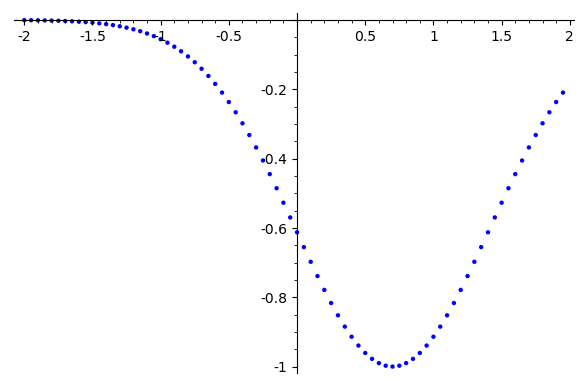

In [164]:
xValuesToPlot=np.arange(-2.0,2.0,0.05)
points(zip(xValuesToPlot,f(xValuesToPlot)))

In [165]:
# the value of the function's minimum, number of function evaluations, number of iterations
print (result.fun, result.nfev, result.nit)

-1.0 13 9


In [166]:
result # we can see result directly too

     fun: -1.0
    nfev: 13
     nit: 9
 success: True
       x: 0.6999999997839409

## Bounded 1D Optimisation

In MLe problems we often want to optimise or minimise $f(x)$ while constraining of bounding $x$ to be inside an interval, say $[0,1]$. This is possible using `method='bounded'` in our previous example. The implementation uses Brent's method under the set constraints. 

See [docs for `scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).

In [167]:
import numpy as np
from scipy import optimize

def f(x):
    return -np.exp(-(x - 0.7)**2)

initial_x = 0.5 # this is where we are initialising the iterative search
boundedResult = optimize.minimize_scalar(f, initial_x, bounds=(0, 1), method='bounded')
boundedResult

     fun: -0.9999999999997916
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 0.6999995435529417

## Maximum Likelihood Estimate using Optimisation

Let us apply the above idea in **Bounded 1D Optimisation** to find the MLe for statistical experiments from $n$ IID samples that are assumed to drawn from a random variable with only one real-valued parameter that satisfies some given  constraints.

We can thus get the MLe by minimising the negative log likelihood function *numerically* using *floating-point numbers* via `numpy` ans `scipy` libraries/packages (such methods are also  called *scientific computing*) .

This approach is easier in a sense as you only need the likelhood expression, however, it comes at a price. The solutions do not in general have guarantees unless various conditions are satisfied. However, a lot of successful methods in statistical machine learning and AI are based on such methods!

# Sample Exam Problem 3 with Solution

Use Bounded 1D Optimisation to find the maximum likelihood estimate for the IID $Exponential(\lambda)$ experiment using data in the array `sampleWaitingTimes` below.

In [168]:
# Sample Exam Problem 3
import numpy as np
from scipy import optimize

# these are the same data-points in sampleWaitingTimes collected by Joshua Fenemore
# Here we make the sampleWaitingTimes as a global variable that we will use inside the function f below 
# this is for simplicity
sampleWaitingTimes = np.array([8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                               8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                               0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                               6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1])

# finding MLE for IID exponential(paramLambda) RV - replace XXX by the right expression
# do NOT change the function name `negLogLklOfExpIIDSamples`
def negLogLklOfExpIIDSamples(paramLam):
    '''negative log likelihood function for IID expoenential trials'''
    return XXX

# you should NOT change the next two lines
boundedResult = optimize.minimize_scalar(negLogLklOfExpIIDSamples, 1.0, bounds=(0.001, 2.0), method='bounded')
boundedResult

NameError: name 'XXX' is not defined

In [169]:
# Sample Exam Problem 3 with Solution

import numpy as np
from scipy import optimize
# Sample Exam Problem 3 with Solution
# these are the same data-points in sampleWaitingTimes collected by Joshua Fenemore
# Here we make the dataSamples as a global variable that we will use inside the function f below - for simplicity
sampleWaitingTimes = np.array([8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                               8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                               0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                               6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1])

# finding MLE for IID exponential(paramLambda) RV
def negLogLklOfExpIIDSamples(paramLam):
    '''negative log likelihood function for IID expoenential trials'''
    return -np.sum( np.log( paramLam * np.exp(-(paramLam * sampleWaitingTimes)) ) )

boundedResult = optimize.minimize_scalar(negLogLklOfExpIIDSamples, 1.0, bounds=(0.001, 1.0), method='bounded')
boundedResult

     fun: 423.1401050037657
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.11018358764527456

---
## Assignment 3, PROBLEM 3
Maximum Points = 2


Use Bounded 1D Optimisation to find the maximum likelihood estimate for the IID $Bernoulli(\theta)$ experiment using data in the array `dataSamples` below.

HINT: First, Study the Solution to the **Sample Exam Problem 2**.

In [170]:

import numpy as np
from scipy import optimize
# do not change next line - dataSamplesCoinToss is the sampled data-points
dataSamplesCoinToss= np.array([0,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0])

# finding MLE for IID Bernoulli(theta) RV
# do not Chnage the name of the next function - just replace XXX
def negLogLklOBernoulliIIDSamples(paramLam):
    '''XXX'''
    XXX
    XXX
    return XXX

theta_initial=XXX

# do NOT change the next two lines
boundedBernoulliResult = optimize.minimize_scalar(negLogLklOBernoulliIIDSamples, theta_initial, \
                                                  bounds=(0.001, 0.99), method='bounded')
boundedBernoulliResult

NameError: name 'XXX' is not defined

## Multi-dimensional Constrained Optimisation

The following example is from [2.7.7.1. Box bounds](https://scipy-lectures.org/advanced/mathematical_optimization/index.html#id54) of [scipy lectures on mathematical optimisation](https://scipy-lectures.org/advanced/mathematical_optimization/index.html).

We want to find the argument that minimises the function $f$ of two variables $(x_1,x_2)$
$$
argmin_{(x_1,x_2) \in [-1.5,1.5]^2} f(x_1,x_2) = \sqrt{\left( (x_1 - 3)^2 + (x_2 - 2)^2 \right)}
$$
but while constraining $(x_1,x_2)$ to lie within the bounding box given by the square $[-1.5,1.5]^2 := [-1.5,1.5] \times [-1.5,1.5]$.

<br>
<br>

<img src="https://scipy-lectures.org/_images/sphx_glr_plot_constraints_002.png">

<br>

We can use this iterative numerical method called `optimize.minimize` to find the MLe of statistical experiments that have more than one parameter using:

- the numerical expression for a function `f` we want to minimise
  - for us, `f` will be `negLogLkl`, the negative log likelihood function, for a given `dataset`
- specifying `parameter_bounding_box`, the appropriate bounding boxes for the parameters (so the likelihood is well-defined)
- specifying `initial_arguments` for the initial values for the parameters in the iterative `optimize.minimize` method
  - make sure the initial value is within the bounding box!

You should have seen these ideas in some form in your scientific computing courses, if not, don't worry as you will see them soon in more advanced scientific computing courses you will be taking in the future.

If you want to use the source to deepen your understanding through a great set of codes and lecture notes that will help you understand what is going on when we call `optimize.minimize` method, then please feel free to dive here:

- [https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html#sphx-glr-advanced-mathematical-optimization-auto-examples-plot-gradient-descent-py](https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html#sphx-glr-advanced-mathematical-optimization-auto-examples-plot-gradient-descent-py)

In [173]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)^2)

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-1.5, 1.5), (-1.5, 1.5)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box) # just call the minimize method!
# notuce that the argmin x = (1.5,1,5) within the bounding-box.

      fun: 1.5811388300841898
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.94868329, -0.31622776])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.5, 1.5])

# Sample Exam Problem 4 with Solution

Use numerical optimisation to find the MLE of the two parameters based on data samples from $30$ IID $Log~Normal(\lambda,\zeta)$ trials.

**Background:** A real-valued random variable $X$ has a $Log~Normal(\lambda,\zeta) $ distribution if $\log(X)$ has a $Normal(\lambda,\zeta^2)$ distribution.  The location parameter $\lambda \in (-\infty,\infty)$ and the scale parameter $\zeta > 0$ is the usual Normal standard deviation.  The PDF is:
$$
f(x; \lambda, \zeta) = \frac{1}{\sqrt{2 \pi} \zeta x }
 \exp{\left( - \frac{1}{2 \zeta^2} (\log(x)-\lambda)^2 \right)}, \qquad x > 0
$$

For pseudo-random constructive clarity of $Log~Normal(\lambda,\zeta)$ RV:
- If $Y$ is a $Normal(\lambda,\zeta^2)$ RV, then $Z=e^Y$ is the corresponding $Log~Normal(\lambda,\zeta)$ RV.

The MLEs $\widehat{\lambda}_n$ and $\widehat{\zeta}_n$ can be solved analytically using bivariate calculus (i.e., setting both partial derivatives of the log-likelihood function w.r.t. $\lambda$ and $\zeta$ simultaneously to $0$ and checking if the Hessian is negative definite at the MLe solution). You already have the skills in multivariate calculus and linear algebra to solve this problem analytically and derive the MLEs (after some work).

Here your task is to use numerical optimisation to obtain the MLEs $\widehat{\lambda}_n$ and $\widehat{\zeta}_n$ based on data in the array `LogNormallySimulatedDataSamples` and check if it is close to the analytically derivable MLEs:

$$
\widehat{\lambda}_n = \frac{1}{n} \sum_{i=1}^n \log(X_i) \qquad \text{ and } \qquad \widehat{\zeta}_n = \sqrt{\frac{1}{n} \sum_{i=1}^n{(\log(X_i)-\widehat{\lambda})^2}}
$$

In [174]:
# Sample Exam Problem 4
import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(1234) # set seed
# simulate 100 IID samples drawn from Normal(10,2)RV
LogNormallySimulatedDataSamples = np.exp(np.random.normal(1.0,0.250,100))

# define the negative log likelihood function you want to minimise by editing XXX
def negLogLklOfIIDLogNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    lambda_param=parameters[0]
    zeta_param=parameters[1]
    XXX
    XXX
    XXX
    negLogLkl = XXX
    return negLogLkl 

# you should only change XXX below and not anything else
parameter_bounding_box=((-5.0, 5.0), (0.005, 5.0)) # specify the constraints for each parameter - some guess work.
initial_arguments = np.array([XXX, XXX]) # point in 2D to initialise the min imize algorithm
result_SampleExamProb4 = optimize.minimize(negLogLklOfIIDLogNormalSamples, \
                                           initial_arguments, bounds=parameter_bounding_box) 

# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
# take advantage of the analytically known MLE to play with bounding boxes and initial conditions
analytical_mle_lambda=(np.log(LogNormallySimulatedDataSamples)).mean()
analytical_mle_zeta=sqrt(((np.log(LogNormallySimulatedDataSamples)-analytical_mle_lambda)^2).mean())
print("Analytically known MLE are = "+\
      str(analytical_mle_lambda) + "  and  " + str(analytical_mle_zeta))
result_SampleExamProb4 # note that the exact MLE is sample mean and sample standard deviation

NameError: name 'XXX' is not defined

In [175]:
# Sample Exam Problem 4 - Solution
import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(1234) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
LogNormallySimulatedDataSamples = np.exp(np.random.normal(1.0,0.250,100))

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDLogNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    lambda_param=parameters[0]
    zeta_param=parameters[1]
    term1 = float(1.0)/(float(sqrt(2.0*pi)*zeta_param)*LogNormallySimulatedDataSamples)
    term2 = float(-1.0/(2.0*zeta_param^2))*(np.log(LogNormallySimulatedDataSamples)-lambda_param)^2
    # here log(term1*exp(term2)) = log(term1)+term2 -- used for numerical stability with floating points
    negLogLkl = -np.sum(np.log(term1)+term2) 
    return negLogLkl 

# you should only change XXX below and not anything else
parameter_bounding_box=((-5.0, 5.0), (0.005, 5.0)) # specify the constraints for each parameter - some guess work.
initial_arguments = np.array([0.0, 1.0]) # point in 2D to initialise the min imize algorithm
result_SampleExamProb4 = optimize.minimize(negLogLklOfIIDLogNormalSamples, \
                                           initial_arguments, bounds=parameter_bounding_box) 

# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
# take advantage of the analytically known MLE to play with bounding boxes and initial conditions
analytical_mle_lambda=(np.log(LogNormallySimulatedDataSamples)).mean()
analytical_mle_zeta=sqrt(((np.log(LogNormallySimulatedDataSamples)-analytical_mle_lambda)^2).mean())
print("Analytically known MLE are = "+\
      str(analytical_mle_lambda) + "  and  " + str(analytical_mle_zeta))
result_SampleExamProb4 # note that the exact MLE is sample mean and sample standard deviation

Analytically known MLE are = 1.0087780707813594  and  0.24892121258385072


      fun: 103.7097756072813
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84217096e-06, -2.27373676e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 10
     njev: 23
   status: 0
  success: True
        x: array([1.00877806, 0.2489212 ])

---
## Assignment 3, PROBLEM 4
Maximum Points = 2


Use the **Multi-dimensional Constrained Optimisation** example above (in `09.ipynb`) to numerically find the MLe for the mean and variance parameter based on `normallySimulatedDataSamples`, an array obtained by a specific simulation of $30$ IID samples from the $Normal(10,2)$ random variable.

Recall that $Normal(\mu, \sigma^2)$ RV has the probability density function given by:

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

You know that the log likelihood function for $n$ IID samples from a Normal RV with parameters $\mu$ and $\sigma$ simply follows from $\sum_{i=1}^n \log(f(x_i; \mu,\sigma))$, based on the IID assumption. 

NOTE: When setting bounding boxes for $\mu$ and $\sigma$ try to start with some guesses like $[-20,20]$ and $[0.1,5.0]$ and make it larger if the solution is at the boundary. Making the left bounding-point for $\sigma$ too close to $0.0$ will cause division by zero Warnings. Other numerical instabilities can happen in such iterative numerical solutions to the MLe. You need to be patient and learn by trial-and-error. You will see the mathematical theory in more details in a future course in scientific computing/optimisation. So don't worry too much now except learning to use it for our problems.  

In [176]:

import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]
    XXX
    XXX # add more or less lines as you need
    return XXX 

# you should only change XXX below and not anything else
parameter_bounding_box=((XXX, XXX), (XXX, XXX)) # specify the constraints for each parameter - some guess work...
initial_arguments = np.array([XXX, XXX]) # point in 2D to initialise the minimize algorithm
result_Ass3Prob4 = optimize.minimize(XXX, initial_arguments, bounds=parameter_bounding_box, XXX) 
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_Ass3Prob4


SyntaxError: positional argument follows keyword argument (<ipython-input-176-b9579b862b0f>, line 22)

# Language BABYLONIA: Python - R - JVM language - C/C++/FORTRAN 

This is a course from the Department of Mathematics and the language is not as important as the learning outcomes.

However, in the applied stats / data science / machine-learning/AI communities there is some debate about which language is best for extracting useful and actionable decisions from data. The industrially recommended consensus is simple: "use the right language/package for the task at hand".

You can see one such debate here:
  - [https://medium.com/@data_driven/python-vs-r-for-data-science-and-the-winner-is-3ebb1a968197](https://medium.com/@data_driven/python-vs-r-for-data-science-and-the-winner-is-3ebb1a968197)

The best advise from me (Raaz) is the same as the one from industry, from the perspective of preparing for industrial-certified exams. Often jobs that extract meaning from data expect one to be able to code in the right language for the particular task. Having employees who are addicted/habbituated to any one language too much creates identifiable inefficiencies for the business process when they refuse to use a readily available package or tool in a language that they are 'against' using in some sense.

The great advantage of SageMath is that it is not only a superset of Python but also of R (along with several classical numerics libraries like [GSL](https://www.gnu.org/software/gsl/), in addition to mathematically precise type hierarchies we have taken significant advantage of so far).

For example, it is trivial to call R programs from a SageMath/Python notebook, as an R kernel is automatically started for you in the background, as shown below:

In [179]:
%%r
print("hi")
a <- 2
a

[1] "hi"
[1] 2


In [180]:
%%r
b <- a*a
b

[1] 4


For peadagogical reasons we will not learn mathematics and basic programming needed for this course in Applied Statistics in Python and R simultaneously from SageMath.

Moreover, R was not designed for manipulating mathematical objects as we can do in the SageMath/Python pairing (which wraps classical libraries from the 1960s onwards in a consistent manner with no conflict in name-spaces) and this is ideal for students who have already had a course in elementary Python programming that can be leveraged, as opposed to learning another language from scratch.

In any event, we can easily drop into R to make you comfortable with switching between SageMath/Python and SageMath/R so you can be well-versed in SageMath/Python/R if you want to. This is a future-proof strategy as you will be prepared when taking courses that use R, C, C++, Maxima, etc.

Here are some starting points for docs on:

- R:
  - [https://cran.r-project.org/doc/manuals/R-intro.html](https://cran.r-project.org/doc/manuals/R-intro.html)
- SageMath/R:
  - [http://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/r.html](http://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/r.html)

We take the attitude: "use the right tool for the job!". We will see a crash demo on using R in SageMath when we see regression.